# Predicción de resultados PV del año 2017. MODELO B

# NO EJECUTAR. 

## Creo el conjunto de datos de 2017 de PV y Meteo

In [ ]:
import pandas as pd
# Leer conjunto de datos de 2017
df_Meteo2017 = pd.read_csv("Sunlab-Faro-Meteo-2017_new_csv.csv", sep=";")
df_PV2017 = pd.read_csv("Sunlab-Faro-PV-2017_new_csv.csv", sep=";")
#PV 2017
df_PV2017 = df_PV2017.dropna(how='all')# Eliminar filas completamente vacías
df_PV2017 = df_PV2017.dropna(axis=1, how='all') # Eliminar columnas completamente vacías
# Ordenar los datos por la columna 'Datetime'
df_sorted_PV2017 = df_PV2017.sort_values(by='Datetime')
df_sorted_PV2017 = df_sorted_PV2017.dropna(how='all')
df_sorted_PV2017 = df_sorted_PV2017.dropna(axis=1, how='all')

#METEO 2017
df_Meteo2017 = df_Meteo2017.dropna(how='all') # Eliminar filas completamente vacías
df_Meteo2017 = df_Meteo2017.dropna(axis=1, how='all') # Eliminar columnas completamente vacías
df_sorted_Meteo2017 = df_Meteo2017.sort_values(by='Datetime') 
# Ordenar los datos por la columna 'Datetime'
df_sorted_Meteo2017 = df_sorted_Meteo2017.dropna(how='all') # Eliminar filas completamente vacías
df_sorted_Meteo2017 = df_sorted_Meteo2017.dropna(axis=1, how='all') # Eliminar columnas completamente vacías
# Guardar los datos ordenados en un nuevo archivo CSV
df_sorted_PV2017.to_csv("PV_real_2017.csv", index=False)
df_sorted_Meteo2017.to_csv("Meteo_real_2017.csv", index=False)

## LEER ARCHIVOS PV Y METEO ORDENADOS

In [ ]:
#Lectura del conjunto de datos unidos con pandas. ARCHIVOS .CSV
df_sorted_PV2017 = pd.read_csv("PV_real_2017.csv", sep=",")
df_sorted_Meteo2017 = pd.read_csv("Meteo_real_2017.csv", sep=",")
# Convertir la columna de fecha a tipo datetime
df_sorted_PV2017['Datetime'] = pd.to_datetime(df_sorted_PV2017['Datetime'],utc = True)
df_sorted_Meteo2017['Datetime'] = pd.to_datetime(df_sorted_Meteo2017['Datetime'],utc=True)


In [ ]:
# Unir los conjuntos de datos en base a la columna fecha
df_combinado = pd.merge(df_sorted_PV2017, df_sorted_Meteo2017, on='Datetime')
df_combinado.to_csv("combinado_2017.csv", index=False)   

# Ejecutar

# 3. Abrir el conjunto de datos (PV y Meteo). Años 2017

### 3.1 Abrir el conjunto de datos


In [ ]:
import pandas as pd
# Lectura y copia del conjunto de datos
df_combinado = pd.read_csv("combinado_2017.csv", sep=",")
df_orig = df_combinado
df = df_orig.copy()

# Mostrar información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206957 entries, 0 to 206956
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Datetime                          206957 non-null  object 
 1   A_Vertical - Voltage DC [V]       200691 non-null  float64
 2   A_Vertical - Current DC [A]       200691 non-null  float64
 3   A_Vertical - Power DC [W]         200691 non-null  float64
 4   A_Optimal - Voltage DC [V]        202860 non-null  float64
 5   A_Optimal - Current DC [A]        202860 non-null  float64
 6   A_Optimal - Power DC [W]          202860 non-null  float64
 7   A_Horizontal - Voltage DC [V]     202599 non-null  float64
 8   A_Horizontal - Current DC [A]     202599 non-null  float64
 9   A_Horizontal - Power DC [W]       202599 non-null  float64
 10  A_Vertical - Temperature [ÂºC]    206957 non-null  float64
 11  A_Optimal - Temperature [ÂºC]     206957 non-null  f

In [ ]:
#Elimino las columnas de V y A
df_pot = df.drop(df.columns[[1,2,4,5,7,8,13,14,16,17,19,20]], axis=1)
df_pot.to_csv("combinado_potencia_2017.csv", index=False)  
df = df_pot.copy()
df.info()
# Mostrar información estadística sobre el conjunto de datos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206957 entries, 0 to 206956
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Datetime                          206957 non-null  object 
 1   A_Vertical - Power DC [W]         200691 non-null  float64
 2   A_Optimal - Power DC [W]          202860 non-null  float64
 3   A_Horizontal - Power DC [W]       202599 non-null  float64
 4   A_Vertical - Temperature [ÂºC]    206957 non-null  float64
 5   A_Optimal - Temperature [ÂºC]     206957 non-null  float64
 6   A_Horizontal - Temperature [ÂºC]  206957 non-null  float64
 7   B_Vertical - Power DC [W]         201760 non-null  float64
 8   B_Optimal - Power DC [W]          202644 non-null  float64
 9   B_Horizontal - Power DC [W]       201650 non-null  float64
 10  B_Vertical - Temperature [ÂºC]    206957 non-null  float64
 11  B_Optimal - Temperature [ÂºC]     206957 non-null  f

A_Vertical - Power DC [W]  A_Optimal - Power DC [W]  \
count                  200691.00                 202860.00   
mean                       61.20                    100.90   
std                        51.61                     70.33   
min                         0.00                      0.00   
25%                        15.94                     31.32   
50%                        49.36                    101.26   
75%                        94.45                    168.92   
max                       244.30                    301.11   

       A_Horizontal - Power DC [W]  A_Vertical - Temperature [ÂºC]  \
count                    202599.00                       206957.00   
mean                         91.51                           32.10   
std                          64.99                           12.81   
min                           0.00                            3.60   
25%                          28.62                           24.10   
50%                          88.80                           31.40   
75%                         146.23                           37.20   
max                         302.69                          106.90   

       A_Optimal - Temperature [ÂºC]  A_Horizontal - Temperature [ÂºC]  \
count                      206957.00                         206957.00   
mean                           28.53                             28.76   
std                             8.93                              9.85   
min                             2.90                              2.00   
25%                            21.50                             20.90   
50%                            28.80                             28.70   
75%                            35.70                             36.90   
max                            55.90                             56.80   

       B_Vertical - Power DC [W]  B_Optimal - Power DC [W]  \
count                  201760.00                 202644.00   
mean                       61.45                     99.70   
std                        53.77                     71.75   
min                         0.00                      0.00   
25%                        14.94                     27.03   
50%                        47.64                     98.21   
75%                        94.95                    169.30   
max                       250.97                    310.71   

       B_Horizontal - Power DC [W]  B_Vertical - Temperature [ÂºC]  \
count                    201650.00                       206957.00   
mean                         89.00                           29.37   
std                          63.91                            7.90   
min                           0.00                            3.90   
25%                          26.71                           23.60   
50%                          86.03                           30.40   
75%                         143.01                           35.30   
max                         296.68                           49.30   

       B_Optimal - Temperature [ÂºC]  B_Horizontal - Temperature [ÂºC]  \
count                      206957.00                         206957.00   
mean                           30.60                             28.67   
std                             9.93                              9.42   
min                             3.00                              2.10   
25%                            22.60                             21.30   
50%                            30.80                             28.70   
75%                            38.70                             36.20   
max                            58.50                             54.50   

       Ambient Temperature [ÂºC]  Global Radiation [W/m2]  \
count                  206957.00                206957.00   
mean                    -7226.53                   456.41   
std                   3297244.90                   324.04   
min               -1500000000.00                 

### 3.2 Selección del prototipo


In [51]:
def seleccionar_prototipo():
    """
    Función para solicitar al usuario que seleccione el prototipo.
    
    Retorna:
    tuple: El prototipo seleccionado.
    """
    prototipo = input("Selecciona el prototipo (A o B): ").upper()
    
    return prototipo

df_AO = df.drop(df.columns[[1,3,4,5,6,7,8,9,10,11,12]], axis=1)
df_BO = df.drop(df.columns[[1,2,3,4,5,6,7,9,10,11,12]], axis=1)

print('df_AO: ')
df_AO.info()
print('____________________________________________________')
print('df_BO: ')
df_BO.info()

df_AO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206957 entries, 0 to 206956
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Datetime                    206957 non-null  object 
 1   A_Optimal - Power DC [W]    202860 non-null  float64
 2   Ambient Temperature [ÂºC]   206957 non-null  float64
 3   Global Radiation [W/m2]     206957 non-null  float64
 4   Diffuse Radiation [W/m2]    206957 non-null  float64
 5   Ultraviolet [W/m2]          206957 non-null  float64
 6   Wind Velocity [m/s]         206957 non-null  float64
 7   Wind Direction [Âº]         206957 non-null  float64
 8   Precipitation [mm]          206957 non-null  float64
 9   Atmospheric pressure [hPa]  206957 non-null  float64
dtypes: float64(9), object(1)
memory usage: 15.8+ MB
____________________________________________________
df_BO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206957 entries, 0 to 

In [52]:
# Solicitar la selección del usuario
prototipo_seleccionado = seleccionar_prototipo()

# Asignar el DataFrame correspondiente basado en la selección del usuario
if prototipo_seleccionado == 'A':
    df = df_AO.copy()
    print('Prototipo seleccionado: A')
elif prototipo_seleccionado == 'B':
    df = df_BO.copy()
    print('Prototipo seleccionado: B')
else:
    raise ValueError("Selección inválida.")

Prototipo seleccionado: B


In [53]:
# Convertir la columna 'Datetime' a un objeto datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extraer el día, mes, año, hora y minuto de la columna 'Datetime'
df['Día'] = df['Datetime'].dt.day
df['Mes'] = df['Datetime'].dt.month
df['Año'] = df['Datetime'].dt.year
df['Hora'] = df['Datetime'].dt.hour
df['Minuto'] = df['Datetime'].dt.minute

# Eliminar la columna 'Datetime' del DataFrame
df = df.drop('Datetime', axis=1)

# Reordenar las columnas para que 'Año', 'Mes', 'Día', 'Hora' y 'Minuto' sean las primeras
df = df[['Año', 'Mes', 'Día', 'Hora', 'Minuto'] + [col for col in df.columns if col not in ['Año', 'Mes', 'Día', 'Hora', 'Minuto']]]

# Mostrar el DataFrame resultante
df = df.sort_index()  # Ordenar los índices
df.head()

Año  Mes  Día  Hora  Minuto  B_Optimal - Power DC [W]  \
0  2017    1   20     7      44                       NaN   
1  2017    1   20     7      45                       NaN   
2  2017    1   20     7      46                       NaN   
3  2017    1   20     7      47                       NaN   
4  2017    1   20     7      48                       NaN   

   Ambient Temperature [ÂºC]  Global Radiation [W/m2]  \
0                       4.33                     3.77   
1                       4.40                     4.11   
2                       4.50                     4.81   
3                       4.62                     5.00   
4                       4.73                     5.03   

   Diffuse Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
0                      3.92                0.93                 2.55   
1                      3.61                0.98                 2.58   
2                      4.29                1.02                 3.53   
3                      4.85                1.07                 3.17   
4                      5.21                1.12                 3.60   

   Wind Direction [Âº]  Precipitation [mm]  Atmospheric pressure [hPa]  
0               332.98                0.00                     1013.70  
1               351.58                0.00                     1013.77  
2               332.47                0.00                     1013.77  
3               335.00                0.00                     1013.80  
4               326.51                0.00                     1013.73

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206957 entries, 0 to 206956
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Año                         206957 non-null  int32  
 1   Mes                         206957 non-null  int32  
 2   Día                         206957 non-null  int32  
 3   Hora                        206957 non-null  int32  
 4   Minuto                      206957 non-null  int32  
 5   B_Optimal - Power DC [W]    202644 non-null  float64
 6   Ambient Temperature [ÂºC]   206957 non-null  float64
 7   Global Radiation [W/m2]     206957 non-null  float64
 8   Diffuse Radiation [W/m2]    206957 non-null  float64
 9   Ultraviolet [W/m2]          206957 non-null  float64
 10  Wind Velocity [m/s]         206957 non-null  float64
 11  Wind Direction [Âº]         206957 non-null  float64
 12  Precipitation [mm]          206957 non-null  float64
 13  Atmospheric pr

In [55]:
df.describe()

Año       Mes       Día      Hora    Minuto  \
count 206957.00 206957.00 206957.00 206957.00 206957.00   
mean    2017.00      6.10     15.94     12.13     29.59   
std        0.00      3.04      8.92      3.70     17.34   
min     2017.00      1.00      1.00      5.00      0.00   
25%     2017.00      4.00      8.00      9.00     15.00   
50%     2017.00      6.00     16.00     12.00     30.00   
75%     2017.00      8.00     24.00     15.00     45.00   
max     2017.00     12.00     31.00     20.00     59.00   

       B_Optimal - Power DC [W]  Ambient Temperature [ÂºC]  \
count                 202644.00                  206957.00   
mean                      99.70                   -7226.53   
std                       71.75                 3297244.90   
min                        0.00             -1500000000.00   
25%                       27.03                      16.90   
50%                       98.21                      21.40   
75%                      169.30                      25.90   
max                      310.71                      37.90   

       Global Radiation [W/m2]  Diffuse Radiation [W/m2]  Ultraviolet [W/m2]  \
count                206957.00                 206957.00           206957.00   
mean                    456.41                    127.60               27.42   
std                     324.04                    104.58               19.75   
min                       0.73                      1.63                0.50   
25%                     159.74                     59.20                9.70   
50%                     437.17                     97.97               25.07   
75%                     725.58                    172.04               43.32   
max                    1484.38                    715.15               85.52   

       Wind Velocity [m/s]  Wind Direction [Âº]  Precipitation [mm]  \
count            206957.00            206957.00           206957.00   
mean              -7245.25               191.27                0.00   
std             3297244.86                86.59                0.02   
min         -1500000000.00                 0.00                0.00   
25%                   1.72               116.70                0.00   
50%                   2.55               203.33                0.00   
75%                   3.42               263.01                0.00   
max                  10.30               360.00                2.03   

       Atmospheric pressure [hPa]  
count                   206957.00  
mean                     -6232.40  
std                    3297244.89  
min                -1499999000.00  
25%                       1012.20  
50%                       1014.82  
75%                       1018.50  
max                       1035.90

### 3.3 Valores nulos

In [56]:
#Análisis de valores nulos de todo el conjunto de datos.
import numpy as np
#Copio el conjunto de datos para evitar alteraciones en el original.
df_copy = df.copy()

# Función para comprobar valores nulos e infinitos
def check_nulls_infs(df):
    num_df = df.apply(pd.to_numeric, errors='coerce')  # Convertir columnas a numéricas donde sea posible
    return {
        'Valores Nulos': df.isnull().any().any(),
        'Valores Infinitos': np.isinf(num_df).any().any(),
        'Número de valores nulos': df.isnull().sum().sum(),
        'Número de valores infinitos': np.isinf(num_df).sum().sum()
    }

null_inf_df_copy = check_nulls_infs(df_copy)

# Crear tablas
tabla_df_copy = pd.DataFrame({
    'Conjunto de Datos': ['df'],
    'Valores Nulos': ['Sí' if null_inf_df_copy['Valores Nulos'] else 'No'],
    'Número de Valores Nulos': [null_inf_df_copy['Número de valores nulos']],
    'Valores Infinitos': ['Sí' if null_inf_df_copy['Valores Infinitos'] else 'No'],
    'Número de Valores Infinitos': [null_inf_df_copy['Número de valores infinitos']]
})
tabla_df_copy

Conjunto de Datos Valores Nulos  Número de Valores Nulos Valores Infinitos  \
0                df            Sí                     4313                No   

   Número de Valores Infinitos  
0                            0

#### 3.3.2. Eliminar los valores nulos

In [57]:
atributos_con_valores_nulos = df_copy.isna().sum()[df_copy.isna().any()]
df_valores_nulos = atributos_con_valores_nulos.reset_index()
df_valores_nulos.columns = ['Atributo', 'Valores_Nulos']

print(df_valores_nulos)

                   Atributo  Valores_Nulos
0  B_Optimal - Power DC [W]           4313


In [58]:
df_copy.isna().sum()

Año                              0
Mes                              0
Día                              0
Hora                             0
Minuto                           0
B_Optimal - Power DC [W]      4313
Ambient Temperature [ÂºC]        0
Global Radiation [W/m2]          0
Diffuse Radiation [W/m2]         0
Ultraviolet [W/m2]               0
Wind Velocity [m/s]              0
Wind Direction [Âº]              0
Precipitation [mm]               0
Atmospheric pressure [hPa]       0
dtype: int64

In [59]:
df_copy.dropna(subset=["B_Optimal - Power DC [W]"], inplace=True)

In [60]:
# # Contamos el número de filas eliminadas
print("Nº filas df: ", len(df))
print("Nº filas df_copy: ", len(df_copy))
print("El número de filas eliminadas es:", len(df) - len(df_copy))

Nº filas df:  206957
Nº filas df_copy:  202644
El número de filas eliminadas es: 4313


##### 3.3.2.2 Parte 2: ELIMINAR COLUMNAS "Diffuse Radiation [W/m2]", "Precipitation (mm)" y "Atmospheric pressure (hPa)"

In [61]:
df_copy_sin_nulos = df_copy.copy()
df_copy_sin_nulos.head()

Año  Mes  Día  Hora  Minuto  B_Optimal - Power DC [W]  \
6   2017    1   20     7      50                      1.24   
7   2017    1   20     7      51                      1.39   
8   2017    1   20     7      52                      1.77   
9   2017    1   20     7      53                      1.94   
10  2017    1   20     7      54                      0.79   

    Ambient Temperature [ÂºC]  Global Radiation [W/m2]  \
6                        4.88                     6.34   
7                        4.90                     6.21   
8                        4.90                     7.27   
9                        4.98                     8.12   
10                       5.00                     8.64   

    Diffuse Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
6                       6.67                1.23                 3.92   
7                       6.15                1.29                 3.67   
8                       6.91                1.35                 3.60   
9                       7.06                1.42                 3.90   
10                      8.17                1.48                 3.55   

    Wind Direction [Âº]  Precipitation [mm]  Atmospheric pressure [hPa]  
6                325.33                0.00                     1013.70  
7                325.67                0.00                     1013.70  
8                331.66                0.00                     1013.77  
9                330.67                0.00                     1013.77  
10               330.99                0.00                     1013.78

In [62]:
# Por lo tanto: se eliminan las columnas de precipitación y presión atmosférica.
df_copy_sin_nulos.drop(["Precipitation [mm]", "Atmospheric pressure [hPa]", "Diffuse Radiation [W/m2]"], axis=1, inplace=True)
# Contamos el número de atributos eliminados
print("El número de atributos en df_copy eliminados es:", len(list(df_copy)) - len(list(df_copy_sin_nulos)))

El número de atributos en df_copy eliminados es: 3


In [63]:
df_copy_sin_nulos.isna().sum()

Año                          0
Mes                          0
Día                          0
Hora                         0
Minuto                       0
B_Optimal - Power DC [W]     0
Ambient Temperature [ÂºC]    0
Global Radiation [W/m2]      0
Ultraviolet [W/m2]           0
Wind Velocity [m/s]          0
Wind Direction [Âº]          0
dtype: int64

In [64]:
df_copy_sin_nulos

Año  Mes  Día  Hora  Minuto  B_Optimal - Power DC [W]  \
6       2017    1   20     7      50                      1.24   
7       2017    1   20     7      51                      1.39   
8       2017    1   20     7      52                      1.77   
9       2017    1   20     7      53                      1.94   
10      2017    1   20     7      54                      0.79   
...      ...  ...  ...   ...     ...                       ...   
206938  2017   12   31    17       0                      1.14   
206939  2017   12   31    17       1                      0.74   
206940  2017   12   31    17       2                      0.84   
206941  2017   12   31    17       3                      0.80   
206942  2017   12   31    17       4                      0.71   

        Ambient Temperature [ÂºC]  Global Radiation [W/m2]  \
6                            4.88                     6.34   
7                            4.90                     6.21   
8                            4.90                     7.27   
9                            4.98                     8.12   
10                           5.00                     8.64   
...                           ...                      ...   
206938                      16.80                    12.73   
206939                      16.80                    11.67   
206940                      16.80                    10.62   
206941                      16.80                     9.88   
206942                      16.77                     7.76   

        Ultraviolet [W/m2]  Wind Velocity [m/s]  Wind Direction [Âº]  
6                     1.23                 3.92               325.33  
7                     1.29                 3.67               325.67  
8                     1.35                 3.60               331.66  
9                     1.42                 3.90               330.67  
10                    1.48                 3.55               330.99  
...                    ...                  ...                  ...  
206938                1.22                 4.97               295.84  
206939                1.21                 4.42               295.67  
206940                1.19                 5.02               292.83  
206941                1.17                 4.95               296.84  
206942                1.13                 4.73               294.34  

[202644 rows x 11 columns]

#### 3.4. Eliminar outliers.

In [65]:
import pandas as pd
import numpy as np

# Crear una función para detectar y eliminar outliers
def eliminar_outliers(df, column, threshold=3):
    df_out = df.copy()
    outliers_indices = []
    # Filtrar por año, mes y día
    grouped = df_out.groupby(['Año', 'Mes', 'Día'])
    
    # Eliminar outliers para cada grupo
    for name, group in grouped:
        mean, std = group[column].mean(), group[column].std()
        print(f"Fecha: {name}, Media: {mean}, Desviación Estándar: {std}")
        mask = (group[column] >= mean - threshold * std) & (group[column] <= mean + threshold * std)
        outliers_indices.extend(group.loc[~mask].index.tolist())
        df_out.loc[group.index, column] = group.loc[mask, column]
    
    return df_out, outliers_indices
# Aplicar la función para eliminar outliers de las columnas y contar los outliers
outliers_count = {}
outliers_indices_dict = {}

df_copy_sin_nulos.rename(columns=lambda x: x.replace("Â", ""), inplace=True)

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos, 'B_Optimal - Power DC [W]')
outliers_count['B_Optimal - Power DC [W]'] = len(outliers_indices)
outliers_indices_dict['B_Optimal - Power DC [W]'] = outliers_indices

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos_sin_outliers_nan, 'Ambient Temperature [ºC]')
outliers_count['Ambient Temperature [ºC]'] = len(outliers_indices)
outliers_indices_dict['Ambient Temperature [ºC]'] = outliers_indices

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos_sin_outliers_nan, 'Global Radiation [W/m2]')
outliers_count['Global Radiation [W/m2]'] = len(outliers_indices)
outliers_indices_dict['Global Radiation [W/m2]'] = outliers_indices

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos_sin_outliers_nan, 'Ultraviolet [W/m2]')
outliers_count['Ultraviolet [W/m2]'] = len(outliers_indices)
outliers_indices_dict['Ultraviolet [W/m2]'] = outliers_indices

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos_sin_outliers_nan, 'Wind Velocity [m/s]')
outliers_count['Wind Velocity [m/s]'] = len(outliers_indices)
outliers_indices_dict['Wind Velocity [m/s]'] = outliers_indices

df_copy_sin_nulos_sin_outliers_nan, outliers_indices = eliminar_outliers(df_copy_sin_nulos_sin_outliers_nan, 'Wind Direction [º]')
outliers_count['Wind Direction [º]'] = len(outliers_indices)
outliers_indices_dict['Wind Direction [º]'] = outliers_indices

# Imprimir los índices de los outliers por columna
for column, indices in outliers_indices_dict.items():
    print(f"Outliers indices in {column}: {indices}")

# Imprimir el conteo de outliers por columna
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")


Fecha: (2017, 1, 20), Media: 86.78923721340388, Desviación Estándar: 59.57909038654963
Fecha: (2017, 1, 21), Media: 122.75693489148583, Desviación Estándar: 69.04173238818403
Fecha: (2017, 1, 22), Media: 115.88995388146911, Desviación Estándar: 75.32185699825406
Fecha: (2017, 1, 23), Media: 133.08638413621264, Desviación Estándar: 65.66630714079064
Fecha: (2017, 1, 24), Media: 132.41462541186164, Desviación Estándar: 65.3497255613593
Fecha: (2017, 1, 25), Media: 116.38867860099337, Desviación Estándar: 67.2310849044099
Fecha: (2017, 1, 26), Media: 6.483484538327526, Desviación Estándar: 4.230776423877636
Fecha: (2017, 1, 27), Media: 110.72005122259695, Desviación Estándar: 83.94988330944311
Fecha: (2017, 1, 28), Media: 112.81276158940396, Desviación Estándar: 71.47884193784236
Fecha: (2017, 1, 29), Media: 118.85698980424142, Desviación Estándar: 72.37918338235981
Fecha: (2017, 1, 30), Media: 123.95748322553898, Desviación Estándar: 68.82636698144955
Fecha: (2017, 1, 31), Media: 15.3397

In [66]:
print(df_copy_sin_nulos_sin_outliers_nan.isna().sum())
# Mostrar la suma de todos los valores NaN en el DataFrame
print("Suma de todos los valores outliers en el DataFrame:",df_copy_sin_nulos_sin_outliers_nan.isna().sum().sum())

Año                            0
Mes                            0
Día                            0
Hora                           0
Minuto                         0
B_Optimal - Power DC [W]     239
Ambient Temperature [ºC]    1323
Global Radiation [W/m2]      170
Ultraviolet [W/m2]            83
Wind Velocity [m/s]          192
Wind Direction [º]          2273
dtype: int64
Suma de todos los valores outliers en el DataFrame: 4280


In [67]:
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["B_Optimal - Power DC [W]"], inplace=True)
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["Ambient Temperature [ºC]"], inplace=True)
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["Global Radiation [W/m2]"], inplace=True)
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["Ultraviolet [W/m2]"], inplace=True)
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["Wind Velocity [m/s]"], inplace=True)
df_copy_sin_nulos_sin_outliers_nan.dropna(subset=["Wind Direction [º]"], inplace=True)

In [68]:
df_copy_sin_nulos_sin_outliers = df_copy_sin_nulos_sin_outliers_nan.copy()

In [69]:
df_copy_sin_nulos_sin_outliers.describe()

Año       Mes       Día      Hora    Minuto  \
count 198593.00 198593.00 198593.00 198593.00 198593.00   
mean    2017.00      6.10     15.92     12.18     29.53   
std        0.00      3.03      8.92      3.61     17.35   
min     2017.00      1.00      1.00      5.00      0.00   
25%     2017.00      4.00      8.00      9.00     14.00   
50%     2017.00      6.00     16.00     12.00     30.00   
75%     2017.00      8.00     24.00     15.00     45.00   
max     2017.00     12.00     31.00     19.00     59.00   

       B_Optimal - Power DC [W]  Ambient Temperature [ºC]  \
count                 198593.00                 198593.00   
mean                     100.88                     21.45   
std                       71.38                      5.57   
min                        0.00                      3.00   
25%                       29.21                     17.02   
50%                      100.33                     21.50   
75%                      169.97                     26.00   
max                      294.84                     37.90   

       Global Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
count                198593.00           198593.00            198593.00   
mean                    467.07               28.06                 2.67   
std                     322.16               19.66                 1.25   
min                       0.74                0.50                 0.00   
25%                     175.26               10.65                 1.78   
50%                     452.59               25.97                 2.58   
75%                     735.00               43.99                 3.43   
max                    1484.38               85.52                10.08   

       Wind Direction [º]  
count           198593.00  
mean               191.27  
std                 84.75  
min                  0.00  
25%                117.49  
50%                202.61  
75%                260.60  
max                360.00

In [70]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Función para graficar los datos de un año específico
# def graficar_datos_año(año):
#     # Filtrar los datos para el año específico
#     datos_año = df_copy_sin_nulos.loc[df_copy_sin_nulos['Año'] == año].copy()
#     datos_año.loc[:, 'Filtered'] =df_copy_sin_nulos_sin_outliers.loc[df_copy_sin_nulos_sin_outliers['Año'] == año, 'B_Optimal - Power DC [W]']

#     # Obtener los meses únicos del año
#     meses_año = datos_año['Mes'].unique()
    
#     # Iterar sobre cada mes
#     for mes in meses_año:
#         # Filtrar los datos para el mes específico
#         datos_mes = datos_año.loc[datos_año['Mes'] == mes]
#         # Obtener los días únicos del mes
#         dias_mes = datos_mes['Día'].unique()

#         # Crear una figura para el mes
#         fig, axes = plt.subplots(4, 8, figsize=(50, 30))
#         mes_nombre = {
#                 1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
#                 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
#             }
#         fig.suptitle(f'Producción de {mes_nombre[int(mes)]} de {año}', fontsize=16)

#         # Iterar sobre cada día y graficar
#         for i, dia in enumerate(dias_mes):
#             # Filtrar los datos para el día específico
#             datos_dia = datos_mes.loc[datos_mes['Día'] == dia]

#             # Crear el vector de horas y minutos para el día específico
#             vector_horas_minutos = datos_dia[['Hora', 'Minuto']].apply(lambda row: f"{int(row['Hora']):02d}:{int(row['Minuto']):02d}", axis=1).tolist()
#             # vector_horas_minutos_sin_outliers = datos_dia[['Hora', 'Minuto']].apply(lambda row: f"{int(row['Hora']):02d}:{int(row['Minuto']):02d}", axis=1).tolist()
#             # Calcular la posición en la cuadrícula
#             row = i // 8
#             col = i % 8

#             # Graficar los datos
#             ax = axes[row, col]
#             ax.plot(vector_horas_minutos, datos_dia['B_Optimal - Power DC [W]'], label='Original', marker="o", linestyle="dashed", alpha=0.5)
#             ax.plot(vector_horas_minutos,datos_dia['Filtered'], label='Filtrados', marker="x", linestyle="-")
#             ax.set_title(f'Producción del {int(dia)} de {mes_nombre[int(mes)]} de {año}')
#             ax.set_xlabel('Hora')
#             ax.set_ylabel('B_Optimal - Power DC [W]')
#             ax.legend()
#             ax.grid(True)
#             ax.set_xticks(range(0, len(vector_horas_minutos), 24))
#             ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

#         plt.tight_layout(rect=[0, 0, 1, 0.96])
#         plt.show()

# # Graficar los datos para los años 2017
# graficar_datos_año(2017)

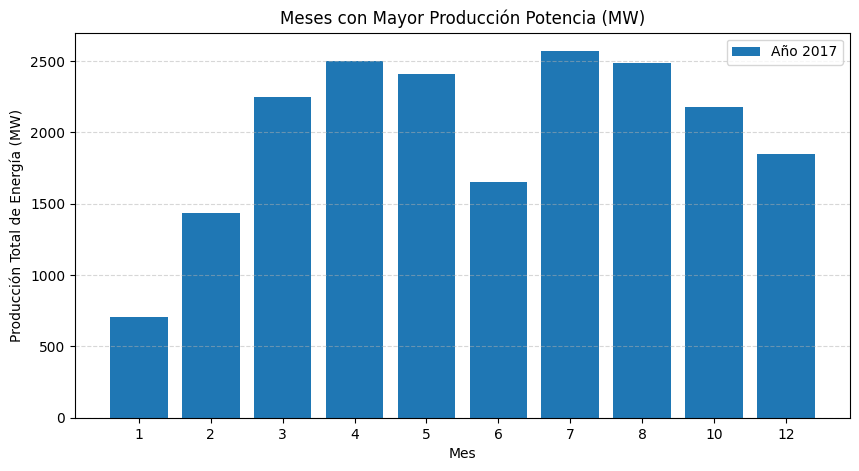

In [71]:
import matplotlib.pyplot as plt

# Convertir los valores de potencia de W a MW
df_copy_sin_nulos_sin_outliers['B_Optimal - Power DC [MW]'] = df_copy_sin_nulos_sin_outliers['B_Optimal - Power DC [W]'] / 1000

# Agrupar por año, mes y sumar la producción de energía
produccion_mensual = df_copy_sin_nulos_sin_outliers.groupby(['Año', 'Mes'])['B_Optimal - Power DC [MW]'].sum().reset_index()

# Encontrar los meses con mayor producción
# meses_mayor_produccion = produccion_mensual.sort_values(by=['Año', 'B_Optimal - Power DC [MW]'], ascending=[True, False]).head(36)
meses_mayor_produccion = produccion_mensual

# Graficar los meses con mayor producción
plt.figure(figsize=(10, 5))

data = meses_mayor_produccion[meses_mayor_produccion['Año'] == 2017]
plt.bar(data['Mes'].astype(str).astype(str), data['B_Optimal - Power DC [MW]'], label=f'Año {2017}')

plt.xlabel('Mes')
plt.ylabel('Producción Total de Energía (MW)')
plt.title('Meses con Mayor Producción Potencia (MW)')

plt.legend()
plt.grid(axis='y', linestyle = '--', alpha = 0.5)
plt.show()

In [72]:
df_copy_sin_nulos_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198593 entries, 6 to 206942
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Año                        198593 non-null  int32  
 1   Mes                        198593 non-null  int32  
 2   Día                        198593 non-null  int32  
 3   Hora                       198593 non-null  int32  
 4   Minuto                     198593 non-null  int32  
 5   B_Optimal - Power DC [W]   198593 non-null  float64
 6   Ambient Temperature [ºC]   198593 non-null  float64
 7   Global Radiation [W/m2]    198593 non-null  float64
 8   Ultraviolet [W/m2]         198593 non-null  float64
 9   Wind Velocity [m/s]        198593 non-null  float64
 10  Wind Direction [º]         198593 non-null  float64
 11  B_Optimal - Power DC [MW]  198593 non-null  float64
dtypes: float64(7), int32(5)
memory usage: 15.9 MB


# 4. Valores outputs reales: y_real_df

In [73]:
y_real = df_copy_sin_nulos_sin_outliers["B_Optimal - Power DC [W]"]
y_real_df = y_real.to_frame(name='B_Optimal - Power DC [W]')
y_real_df.head()

B_Optimal - Power DC [W]
6                       1.24
7                       1.39
8                       1.77
9                       1.94
10                      0.79

# 5. Adaptación del conjunto combinado para input al modelo de ML

In [74]:
df_input = df_copy_sin_nulos_sin_outliers.copy()
df_input.drop(["B_Optimal - Power DC [W]"], axis=1, inplace=True)

In [75]:
df_input.isna().sum()

Año                          0
Mes                          0
Día                          0
Hora                         0
Minuto                       0
Ambient Temperature [ºC]     0
Global Radiation [W/m2]      0
Ultraviolet [W/m2]           0
Wind Velocity [m/s]          0
Wind Direction [º]           0
B_Optimal - Power DC [MW]    0
dtype: int64

In [77]:
df_input

Año  Mes  Día  Hora  Minuto  Ambient Temperature [ºC]  \
6       2017    1   20     7      50                      4.88   
7       2017    1   20     7      51                      4.90   
8       2017    1   20     7      52                      4.90   
9       2017    1   20     7      53                      4.98   
10      2017    1   20     7      54                      5.00   
...      ...  ...  ...   ...     ...                       ...   
206938  2017   12   31    17       0                     16.80   
206939  2017   12   31    17       1                     16.80   
206940  2017   12   31    17       2                     16.80   
206941  2017   12   31    17       3                     16.80   
206942  2017   12   31    17       4                     16.77   

        Global Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
6                          6.34                1.23                 3.92   
7                          6.21                1.29                 3.67   
8                          7.27                1.35                 3.60   
9                          8.12                1.42                 3.90   
10                         8.64                1.48                 3.55   
...                         ...                 ...                  ...   
206938                    12.73                1.22                 4.97   
206939                    11.67                1.21                 4.42   
206940                    10.62                1.19                 5.02   
206941                     9.88                1.17                 4.95   
206942                     7.76                1.13                 4.73   

        Wind Direction [º]  B_Optimal - Power DC [MW]  
6                   325.33                       0.00  
7                   325.67                       0.00  
8                   331.66                       0.00  
9                   330.67                       0.00  
10                  330.99                       0.00  
...                    ...                        ...  
206938              295.84                       0.00  
206939              295.67                       0.00  
206940              292.83                       0.00  
206941              296.84                       0.00  
206942              294.34                       0.00  

[198593 rows x 11 columns]

# 6. Algoritmos

## Predicción

In [78]:
df_input.drop(['B_Optimal - Power DC [MW]'], axis=1, inplace=True)

In [79]:
# Conjunto de input:
x = df_input
print(x)
print(x.describe())

         Año  Mes  Día  Hora  Minuto  Ambient Temperature [ºC]  \
6       2017    1   20     7      50                      4.88   
7       2017    1   20     7      51                      4.90   
8       2017    1   20     7      52                      4.90   
9       2017    1   20     7      53                      4.98   
10      2017    1   20     7      54                      5.00   
...      ...  ...  ...   ...     ...                       ...   
206938  2017   12   31    17       0                     16.80   
206939  2017   12   31    17       1                     16.80   
206940  2017   12   31    17       2                     16.80   
206941  2017   12   31    17       3                     16.80   
206942  2017   12   31    17       4                     16.77   

        Global Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
6                          6.34                1.23                 3.92   
7                          6.21                1.29    

In [80]:
#DATOS ESCALADOS
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
y_real_df_scaled = scaler.fit_transform(y_real_df.values.reshape(-1, 1))
# Transformación a un DataFrame de Pandas
x_scaled = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
y_real_df_scaled = pd.DataFrame(y_real_df_scaled, columns=y_real_df.columns, index=y_real_df.index)
# Copiamos el conjunto de datos para no alterar el original
x_scaled_copy = x_scaled.copy()
y_real_df_scaled_copy = y_real_df_scaled.copy()
x_scaled_copy.isna().any()
y_real_df_scaled_copy.isna().any()

B_Optimal - Power DC [W]    False
dtype: bool

In [81]:
print(x_scaled_copy)
print(x_scaled_copy.describe())

        Año   Mes  Día  Hora  Minuto  Ambient Temperature [ºC]  \
6      0.00 -1.25 0.25 -0.83    0.65                     -1.85   
7      0.00 -1.25 0.25 -0.83    0.68                     -1.85   
8      0.00 -1.25 0.25 -0.83    0.71                     -1.85   
9      0.00 -1.25 0.25 -0.83    0.74                     -1.84   
10     0.00 -1.25 0.25 -0.83    0.77                     -1.84   
...     ...   ...  ...   ...     ...                       ...   
206938 0.00  1.50 0.94  0.83   -0.97                     -0.52   
206939 0.00  1.50 0.94  0.83   -0.94                     -0.52   
206940 0.00  1.50 0.94  0.83   -0.90                     -0.52   
206941 0.00  1.50 0.94  0.83   -0.87                     -0.52   
206942 0.00  1.50 0.94  0.83   -0.84                     -0.53   

        Global Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
6                         -0.80               -0.74                 0.81   
7                         -0.80               -0.74    

In [ ]:
import joblib


# Cargar los diferentes modelos de ML:
# Linear Regression
LinearRegression_model = joblib.load('model_B_LinearRegression.pkl')
# Polynomial Regression Grado 2 y 2 con interacciones
PolynomialRegressionGrado2_model = joblib.load('model_B_PolynomialRegressionGrado2.pkl')
PolynomialRegressionGrado2Interac_model = joblib.load('model_B_PolynomialRegressionGrado2Interac.pkl')
PolynomialRegressionGrado3_model = joblib.load('model_B_PolynomialRegressionGrado3.pkl')
PolynomialRegressionGrado3Interac_model = joblib.load('model_B_PolynomialRegressionGrado3Interac.pkl')
#Ridge y Lasso (sin escalar)
Ridge_model = joblib.load('modelo_B_Ridge.pkl')
RidgeScaled_model = joblib.load('model_B_RidgeScaled.pkl')
Lasso_model = joblib.load('model_B_Lasso.pkl')
LassoScaled_model = joblib.load('model_B_LassoScaled.pkl')
#Decission Forest
DT16_model = joblib.load('model_B_DT16.pkl')
#Random Forest
RF16_model = joblib.load('model_B_RF16.pkl')

#Predecir valores de PV
# Linear Regression
#Tiempo de ejecución
import time
start_time = time.time()
LinearRegression_model_pred = LinearRegression_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Linear Regression --- %s seconds ---" % execution_time)
# Polynomial Regression Grado 2 y 2 con interacciones
start_time = time.time()
PolynomialRegressionGrado2_model_pred = PolynomialRegressionGrado2_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Polynomial Regression Grado 2 --- %s seconds ---" % execution_time)
start_time = time.time()
PolynomialRegressionGrado2Interac_model_pred = PolynomialRegressionGrado2Interac_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Polynomial Regression Grado 2 con interacciones --- %s seconds ---" % execution_time)
start_time = time.time()
PolynomialRegressionGrado3_model_pred = PolynomialRegressionGrado3_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Polynomial Regression Grado 3 --- %s seconds ---" % execution_time)
start_time = time.time()
PolynomialRegressionGrado3Interac_model_pred = PolynomialRegressionGrado3Interac_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Polynomial Regression Grado 3 con interacciones --- %s seconds ---" % execution_time)
#Ridge y Lasso 
start_time = time.time()
Ridge_model_pred = Ridge_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Ridge --- %s seconds ---" % execution_time)
start_time = time.time()
RidgeScaled_model_pred = RidgeScaled_model.predict(x_scaled_copy)
end_time = time.time()
execution_time = end_time - start_time
print("Ridge Scaled --- %s seconds ---" % execution_time)
start_time = time.time()
Lasso_model_pred = Lasso_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Lasso --- %s seconds ---" % execution_time)
start_time = time.time()
LassoScaled_model_pred = LassoScaled_model.predict(x_scaled_copy)
end_time = time.time()
execution_time = end_time - start_time
print("Lasso Scaled --- %s seconds ---" % execution_time)

#Decission Forest
start_time = time.time()
DT16_model_pred = DT16_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Decission Forest --- %s seconds ---" % execution_time)
#Random Forest
start_time = time.time()
RF16_model_pred = RF16_model.predict(x)
end_time = time.time()
execution_time = end_time - start_time
print("Random Forest --- %s seconds ---" % execution_time)

## Métricas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo Linear Regression
mse_lr = mean_squared_error(y_real_df, LinearRegression_model_pred)
r2_lr = r2_score(y_real_df, LinearRegression_model_pred)
mae_lr = mean_absolute_error(y_real_df, LinearRegression_model_pred)

print("Linear Regression:")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_lr:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_lr:.2f}")

# Evaluar el modelo Polynomial Regression Grado 2
mse_mr2 = mean_squared_error(y_real_df, PolynomialRegressionGrado2_model_pred)
r2_mr2 = r2_score(y_real_df, PolynomialRegressionGrado2_model_pred)
mae_mr2 = mean_absolute_error(y_real_df, PolynomialRegressionGrado2_model_pred)

print("\nPolynomial Regression Grado 2:")
print(f"Error Cuadrático Medio (MSE): {mse_mr2:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_mr2:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_mr2:.2f}")

# Evaluar el modelo Polynomial Regression Grado 2 con interacciones
mse_mr2i = mean_squared_error(y_real_df, PolynomialRegressionGrado2Interac_model_pred)
r2_mr2i = r2_score(y_real_df, PolynomialRegressionGrado2Interac_model_pred)
mae_mr2i = mean_absolute_error(y_real_df, PolynomialRegressionGrado2Interac_model_pred)

print("\nPolynomial Regression Grado 2 con interacciones:")
print(f"Error Cuadrático Medio (MSE): {mse_mr2i:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_mr2i:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_mr2i:.2f}")

# Evaluar el modelo Polynomial Regression Grado 3
mse_mr3 = mean_squared_error(y_real_df, PolynomialRegressionGrado3_model_pred)
r2_mr3 = r2_score(y_real_df, PolynomialRegressionGrado3_model_pred)
mae_mr3 = mean_absolute_error(y_real_df, PolynomialRegressionGrado3_model_pred)

print("\nPolynomial Regression Grado 3:")
print(f"Error Cuadrático Medio (MSE): {mse_mr3:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_mr3:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_mr3:.2f}")

# Evaluar el modelo Polynomial Regression Grado 3 con interacciones
mse_mr3i = mean_squared_error(y_real_df, PolynomialRegressionGrado3Interac_model_pred)
r2_mr3i = r2_score(y_real_df, PolynomialRegressionGrado3Interac_model_pred)
mae_mr3i = mean_absolute_error(y_real_df, PolynomialRegressionGrado3Interac_model_pred)

print("\nPolynomial Regression Grado 3 con interacciones:")
print(f"Error Cuadrático Medio (MSE): {mse_mr3i:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_mr3i:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_mr3i:.2f}")

# Evaluar el modelo Ridge
mse_ridge = mean_squared_error(y_real_df, Ridge_model_pred)
r2_ridge = r2_score(y_real_df, Ridge_model_pred)
mae_ridge = mean_absolute_error(y_real_df, Ridge_model_pred)

print("\nRidge:")
print(f"Error Cuadrático Medio (MSE): {mse_ridge:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_ridge:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_ridge:.2f}")

# Evaluar el modelo Ridge Scaled
mse_ridge_scaled = mean_squared_error(y_real_df_scaled_copy, RidgeScaled_model_pred)
r2_ridge_scaled = r2_score(y_real_df_scaled_copy, RidgeScaled_model_pred)
mae_ridge_scaled = mean_absolute_error(y_real_df_scaled_copy, RidgeScaled_model_pred)

print("\nRidge Scaled:")
print(f"Error Cuadrático Medio (MSE): {mse_ridge_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_ridge_scaled:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_ridge_scaled:.2f}")

# Evaluar el modelo Lasso
mse_lasso = mean_squared_error(y_real_df, Lasso_model_pred)
r2_lasso = r2_score(y_real_df, Lasso_model_pred)
mae_lasso = mean_absolute_error(y_real_df, Lasso_model_pred)

print("\nLasso:")
print(f"Error Cuadrático Medio (MSE): {mse_lasso:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_lasso:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_lasso:.2f}")

# Evaluar el modelo Lasso Scaled
mse_lasso_scaled = mean_squared_error(y_real_df_scaled_copy, LassoScaled_model_pred)
r2_lasso_scaled = r2_score(y_real_df_scaled_copy, LassoScaled_model_pred)
mae_lasso_scaled = mean_absolute_error(y_real_df_scaled_copy, LassoScaled_model_pred)

print("\nLasso Scaled:")
print(f"Error Cuadrático Medio (MSE): {mse_lasso_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_lasso_scaled:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_lasso_scaled:.2f}")

# Evaluar el modelo Decision Tree
mse_dt16 = mean_squared_error(y_real_df, DT16_model_pred)
r2_dt16 = r2_score(y_real_df, DT16_model_pred)
mae_dt16 = mean_absolute_error(y_real_df, DT16_model_pred)

print("\nDecision Tree:")
print(f"Error Cuadrático Medio (MSE): {mse_dt16:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_dt16:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_dt16:.2f}")

# Evaluar el modelo Random Forest
mse_rf16 = mean_squared_error(y_real_df, RF16_model_pred)
r2_rf16 = r2_score(y_real_df, RF16_model_pred)
mae_rf16 = mean_absolute_error(y_real_df, RF16_model_pred)

print("\nRandom Forest:")
print(f"Error Cuadrático Medio (MSE): {mse_rf16:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_rf16:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_rf16:.2f}")



In [ ]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Polynomial Regression Grado 2', 'Polynomial Regression Grado 2 con interacciones', 
               'Polynomial Regression Grado 3', 'Polynomial Regression Grado 3 con interacciones', 'Ridge', 'Ridge Scaled', 
               'Lasso', 'Lasso Scaled', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_mr2, mse_mr2i, mse_mr3, mse_mr3i, mse_ridge, mse_ridge_scaled, mse_lasso, mse_lasso_scaled, mse_dt16, mse_rf16],
    'R^2': [r2_lr, r2_mr2, r2_mr2i, r2_mr3, r2_mr3i, r2_ridge, r2_ridge_scaled, r2_lasso, r2_lasso_scaled, r2_dt16, r2_rf16],
    'MAE': [mae_lr, mae_mr2, mae_mr2i, mae_mr3, mae_mr3i, mae_ridge, mae_ridge_scaled, mae_lasso, mae_lasso_scaled, mae_dt16, mae_rf16]
})

# Redondear los valores a dos decimales
resultados = resultados.round(2)

# Ajustar la visualización para evitar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Mostrar la tabla de resultados
resultados


## Gráficas

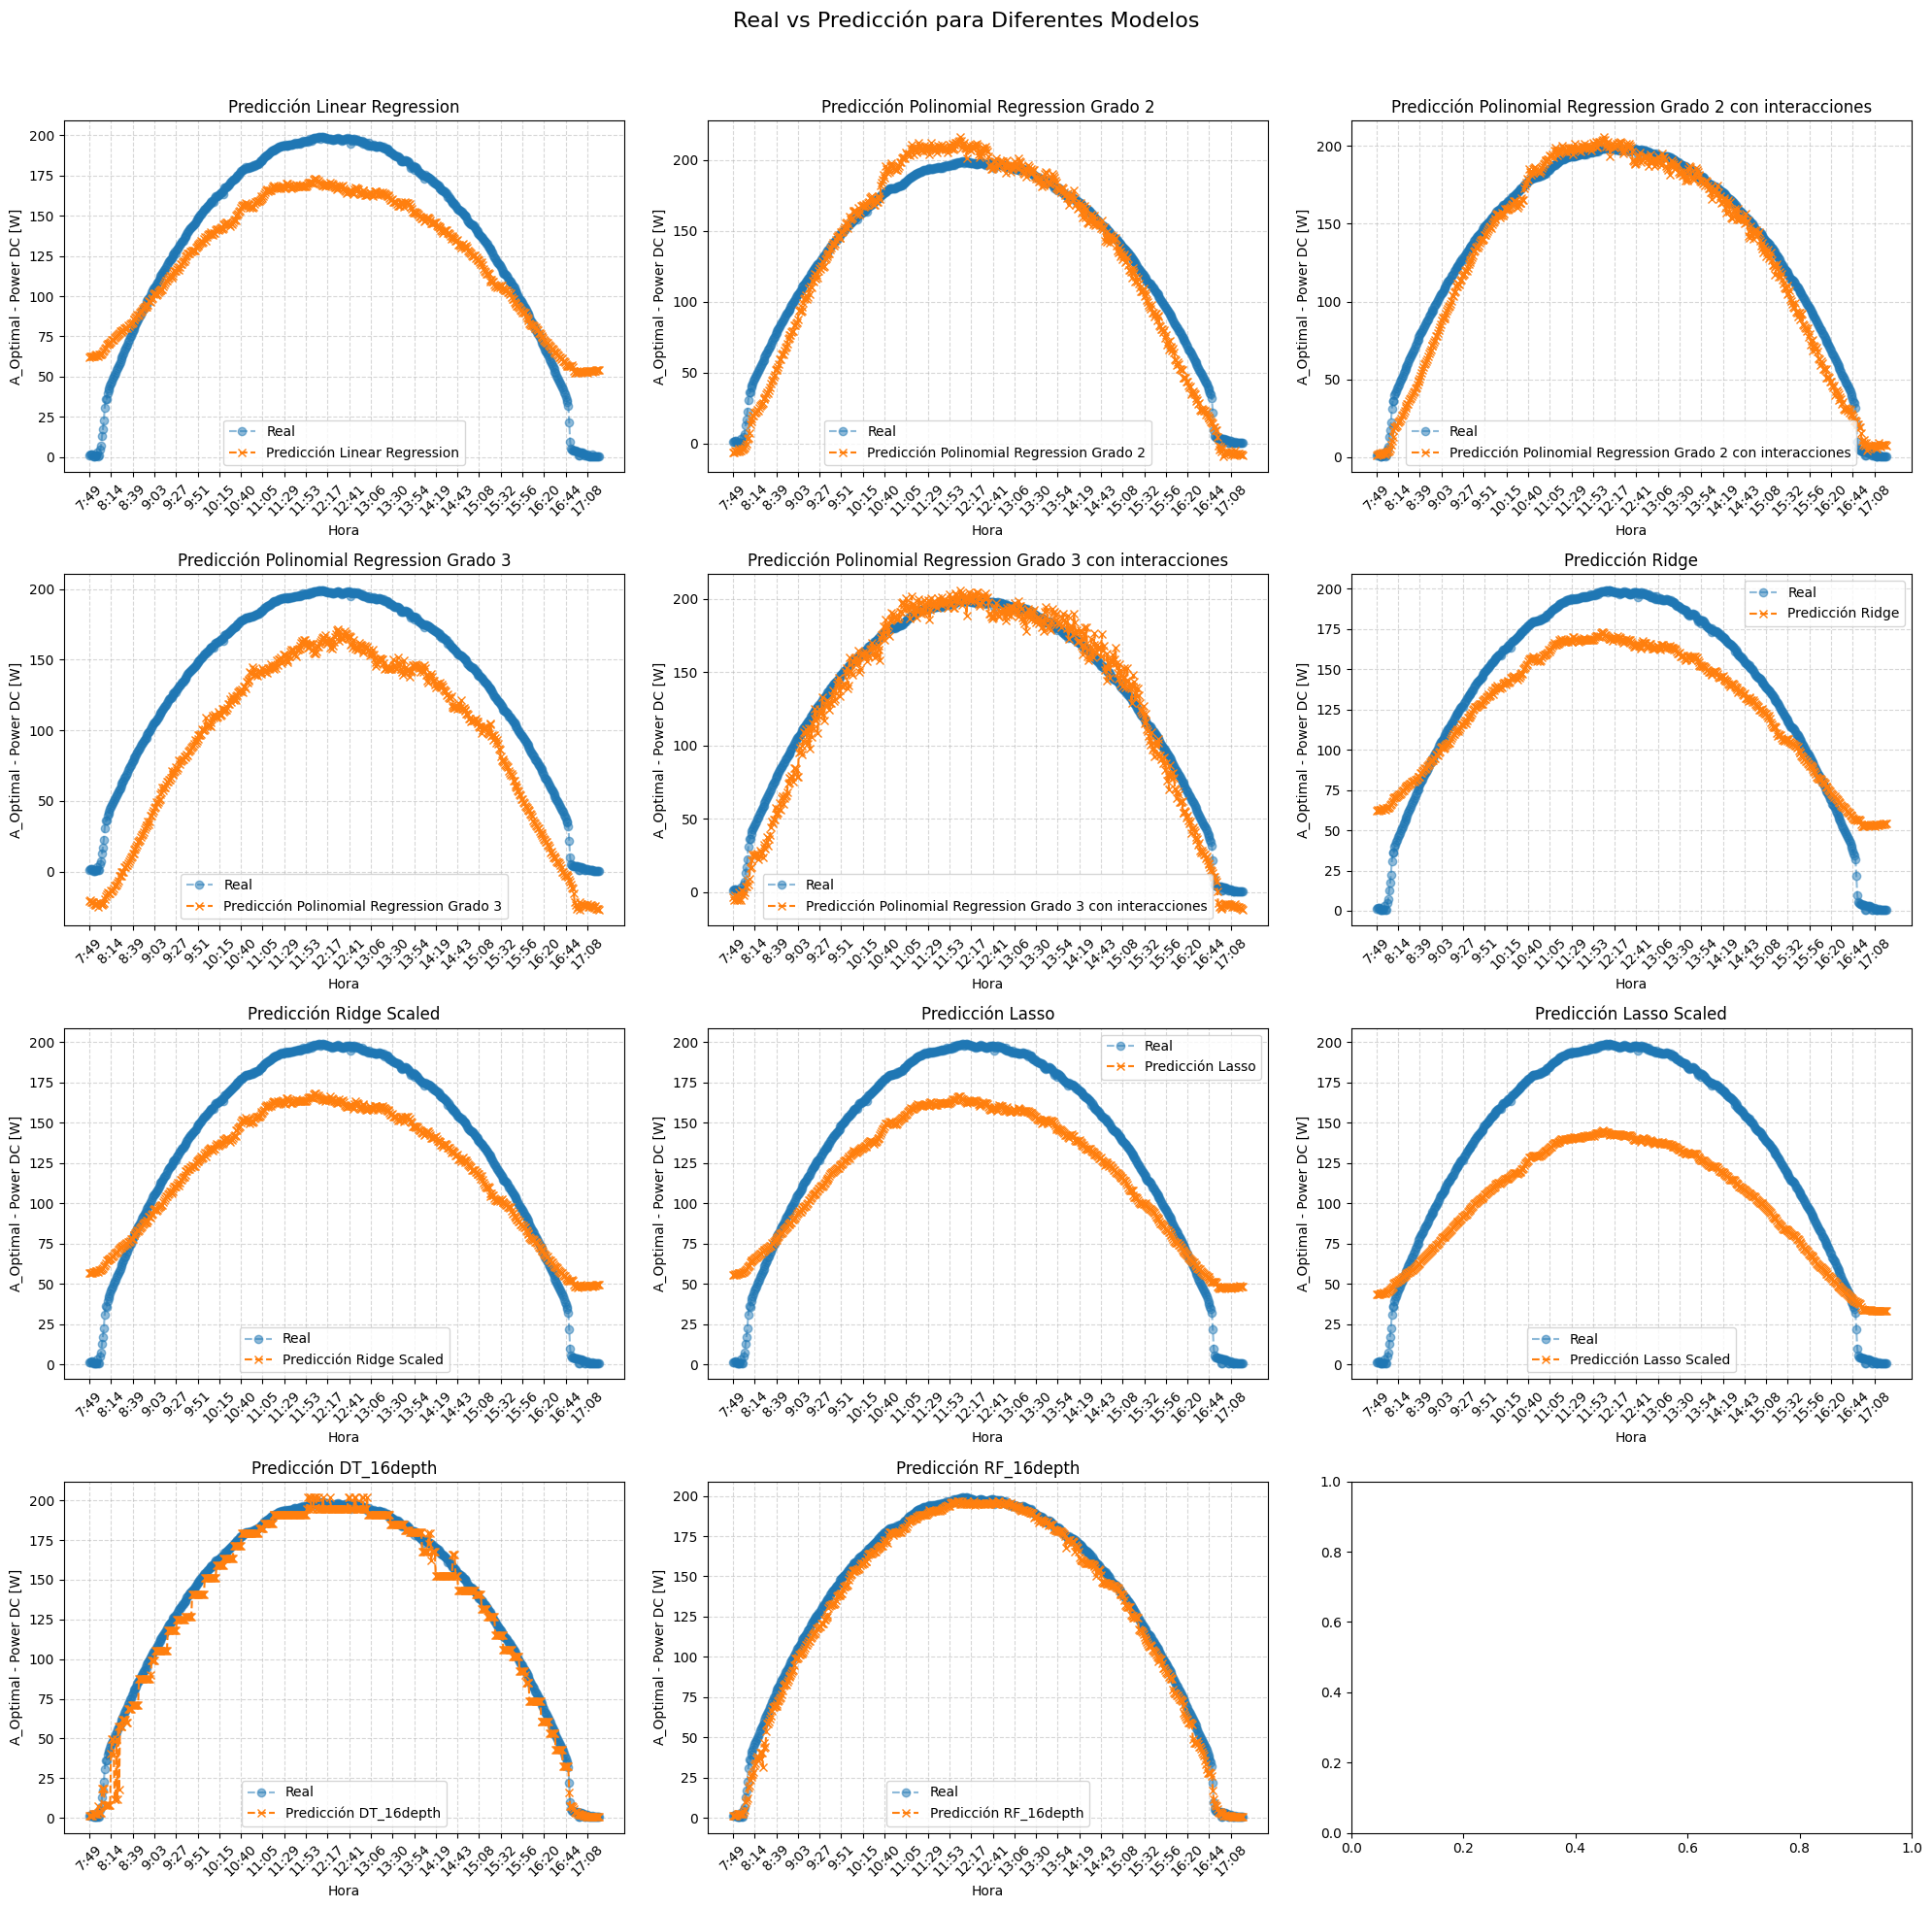

In [ ]:
#Invertir antes de graficar Ridge y Lasso Scaled
RidgeScaled_model_pred_inv = scaler.inverse_transform(RidgeScaled_model_pred.reshape(-1, 1))
LassoScaled_model_pred_inv = scaler.inverse_transform(LassoScaled_model_pred.reshape(-1, 1))



comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Predicción Linear Regression': LinearRegression_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Predicción Ridge': Ridge_model_pred.flatten(),
    'Predicción Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Predicción Lasso': Lasso_model_pred.flatten(),
    'Predicción Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'Predicción DT_16depth': DT16_model_pred.flatten(),
    'Predicción RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de junio para el año 2017
dias_mayor_produccion = {}
for year in [2017]:
    mes_junio = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 12)]
    dia_mayor_produccion = mes_junio.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
modelos = [
    'Predicción Linear Regression', 'Predicción Polynomial Regression Grado 2', 
    'Predicción Polynomial Regression Grado 2 con interacciones', 'Predicción Polynomial Regression Grado 3', 
    'Predicción Polynomial Regression Grado 3 con interacciones', 'Predicción Ridge', 
    'Predicción Ridge Scaled', 'Predicción Lasso', 'Predicción Lasso Scaled', 
    'Predicción DT_16depth', 'Predicción RF_16depth'
]

# Crear la figura y los ejes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Real vs Predicción para Diferentes Modelos', fontsize=16)

# Graficar cada modelo
for i, modelo in enumerate(modelos):
    ax = axes[i // 3, i % 3]
    datos_dia_mayor = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 12) & (comparacion['Día'] == 18)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Graficar los datos
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor[modelo], label=modelo, marker="x", linestyle="--")
    ax.set_title(modelo)
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


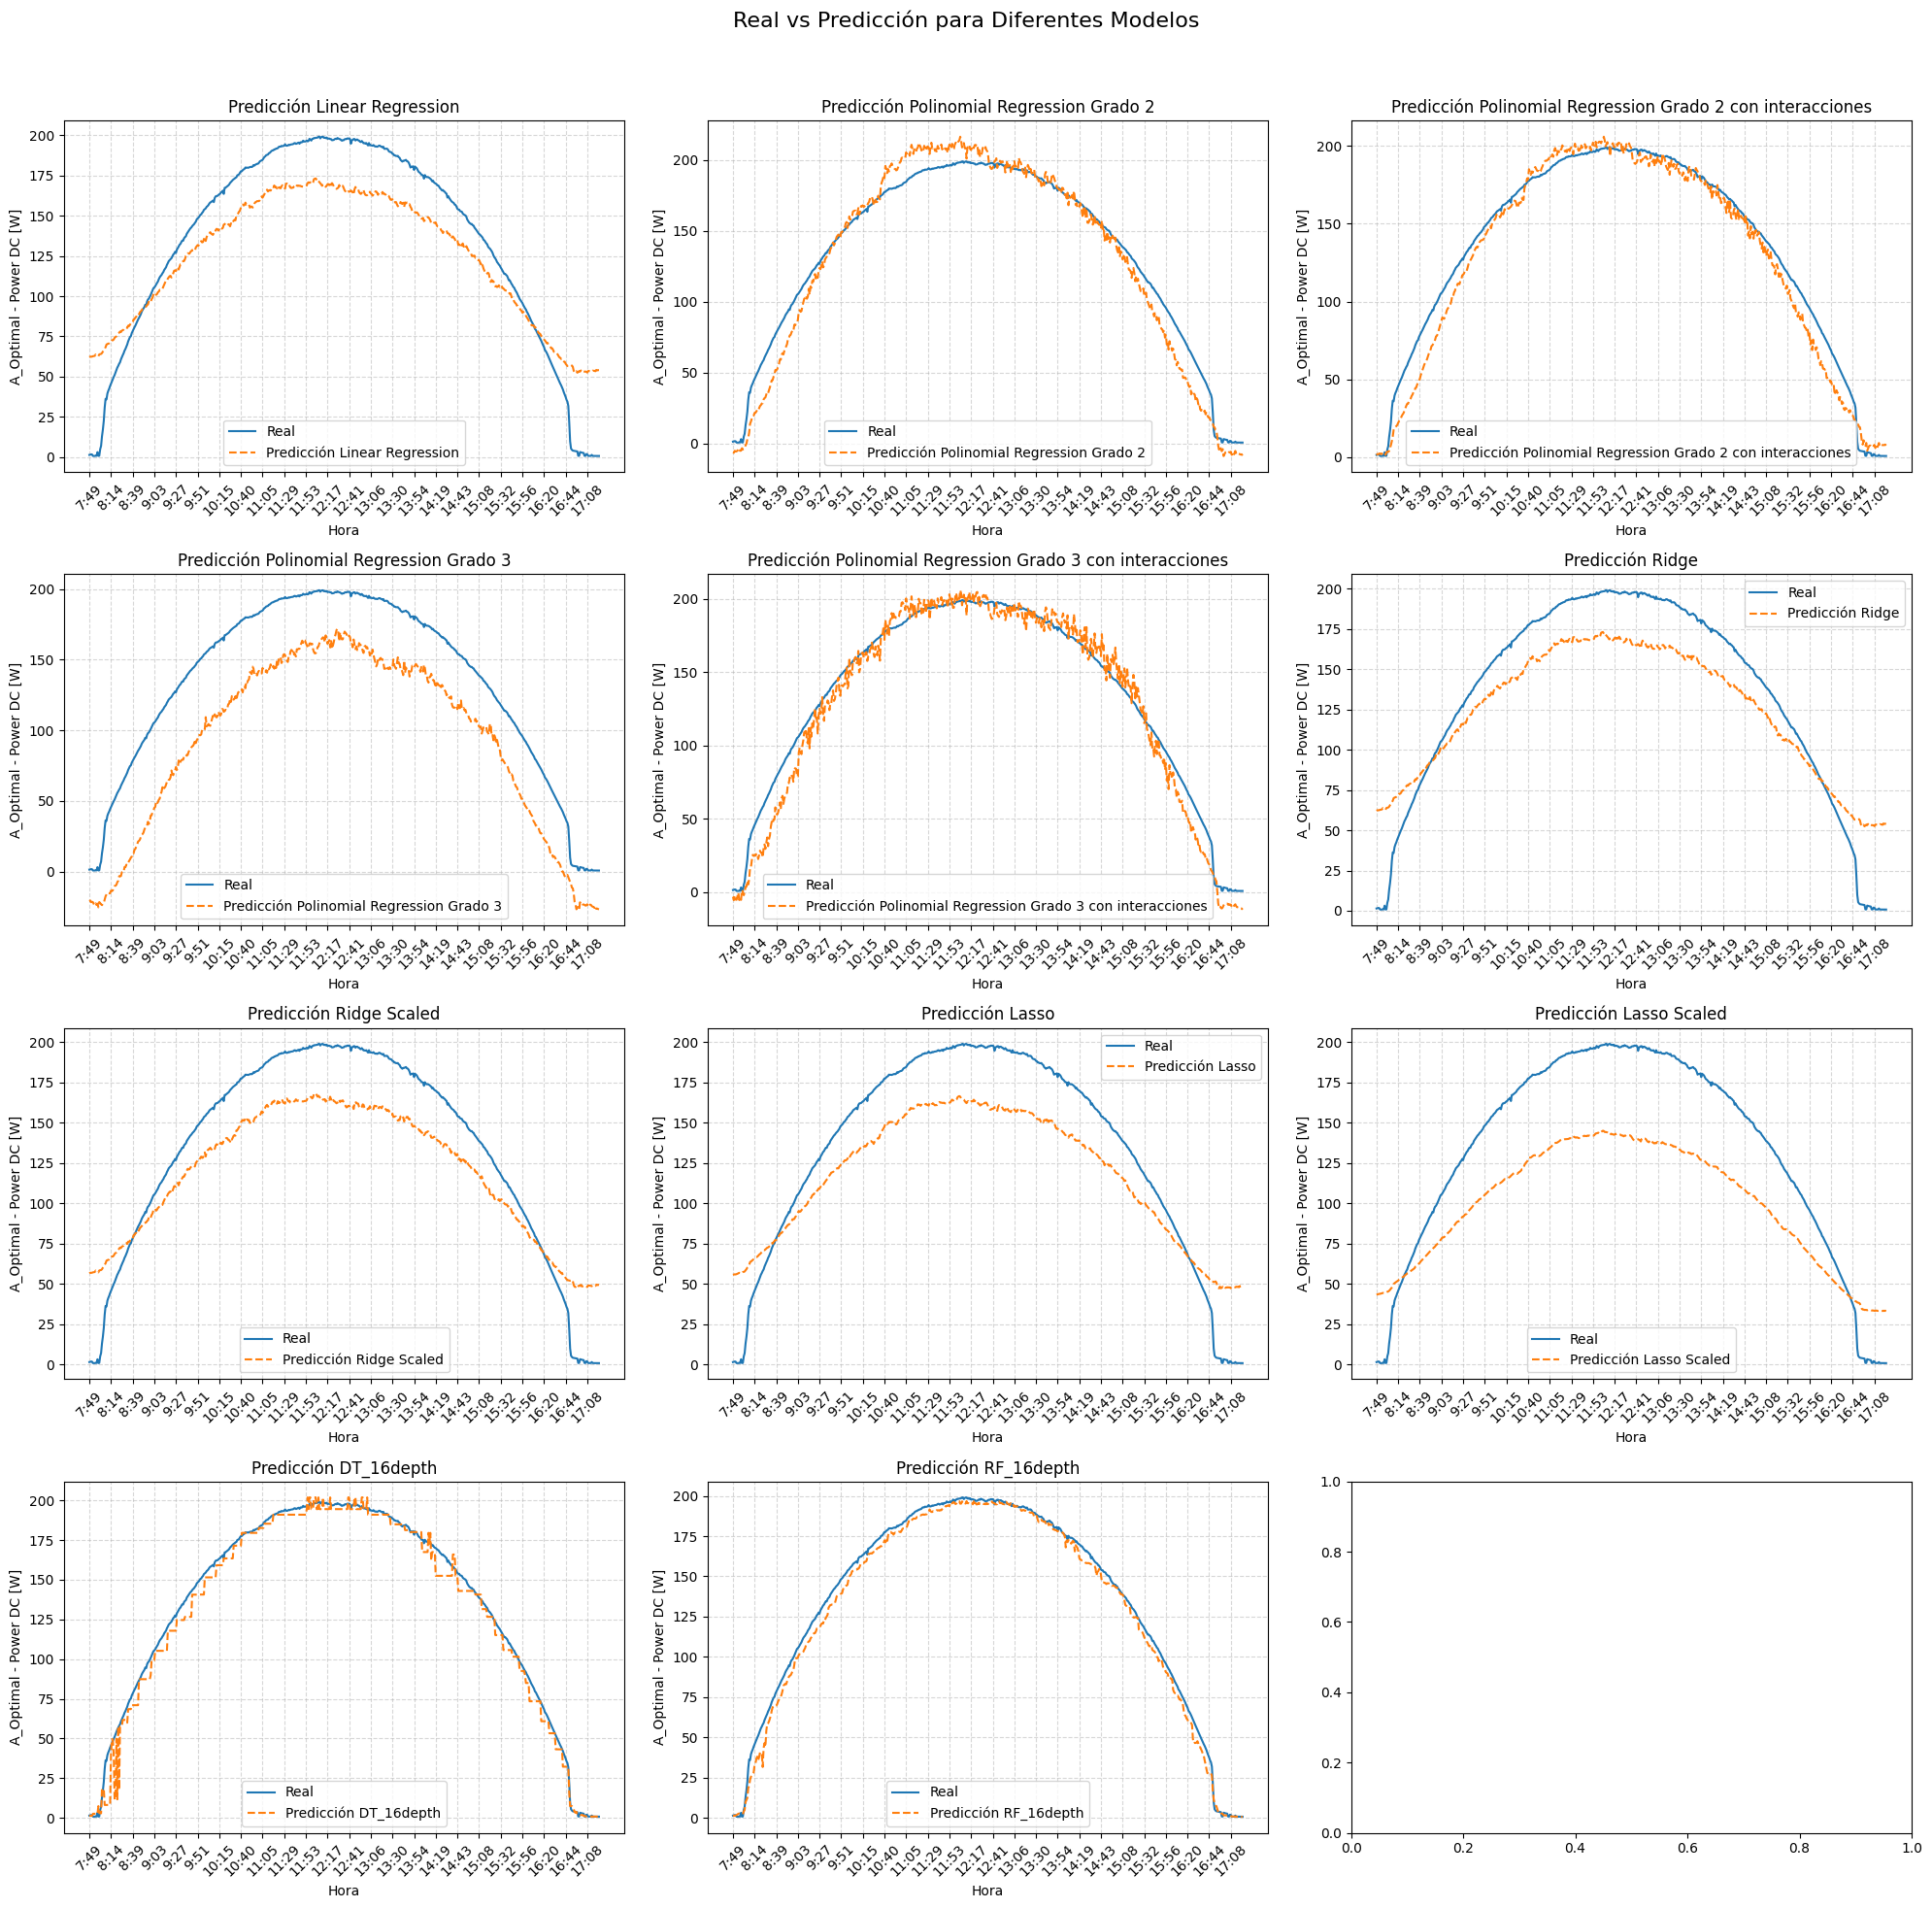

In [ ]:

comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Predicción Linear Regression': LinearRegression_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Predicción Ridge': Ridge_model_pred.flatten(),
    'Predicción Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Predicción Lasso': Lasso_model_pred.flatten(),
    'Predicción Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'Predicción DT_16depth': DT16_model_pred.flatten(),
    'Predicción RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de junio para el año 2017
dias_mayor_produccion = {}
for year in [2017]:
    mes_junio = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 12)]
    dia_mayor_produccion = mes_junio.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la figura y los ejes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Real vs Predicción para Diferentes Modelos', fontsize=16)

# Lista de modelos
modelos = [
    'Predicción Linear Regression', 'Predicción Polynomial Regression Grado 2', 
    'Predicción Polynomial Regression Grado 2 con interacciones', 'Predicción Polynomial Regression Grado 3', 
    'Predicción Polynomial Regression Grado 3 con interacciones', 'Predicción Ridge', 
    'Predicción Ridge Scaled', 'Predicción Lasso', 'Predicción Lasso Scaled', 
    'Predicción DT_16depth', 'Predicción RF_16depth'
]
# Graficar cada modelo
for i, modelo in enumerate(modelos):
    ax = axes[i // 3, i % 3]
    datos_dia_mayor = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 12) & (comparacion['Día'] == 18)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Graficar los datos
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor[modelo], label=modelo, linestyle="--")
    ax.set_title(modelo)
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

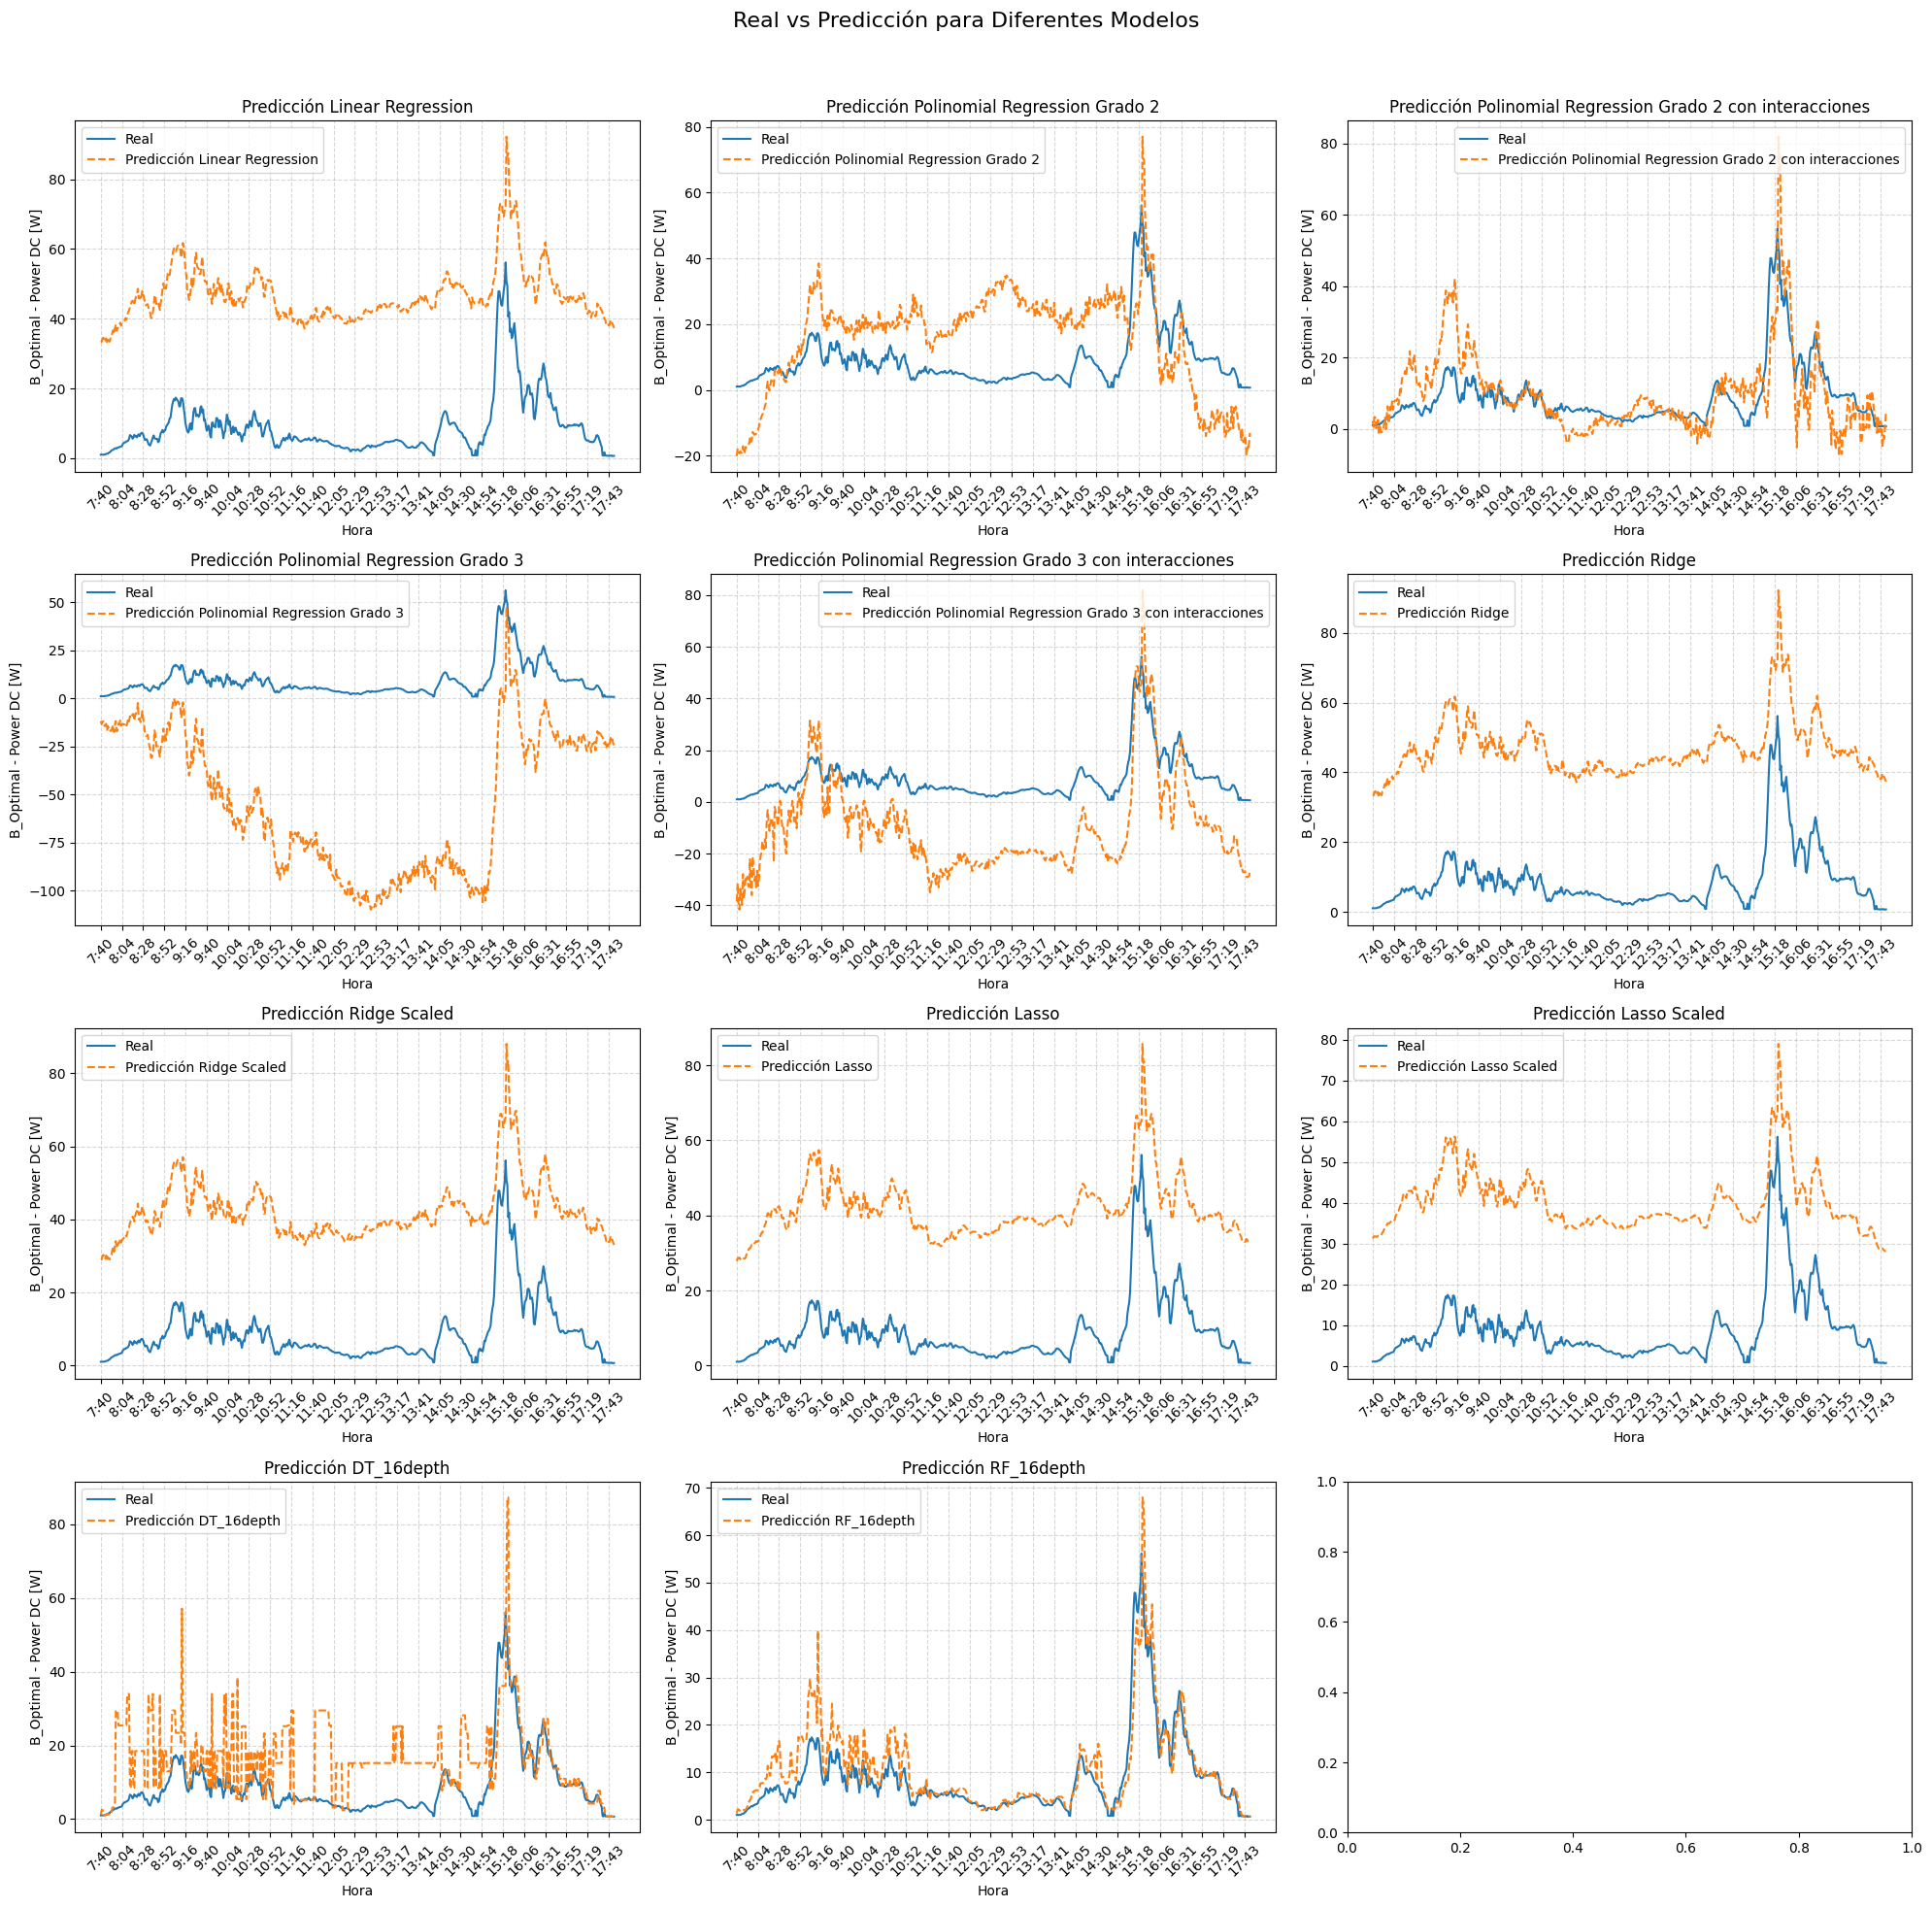

In [ ]:

comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Predicción Linear Regression': LinearRegression_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Predicción Ridge': Ridge_model_pred.flatten(),
    'Predicción Lasso': Lasso_model_pred.flatten(),
    'Predicción Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Predicción Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'Predicción DT_16depth': DT16_model_pred.flatten(),
    'Predicción RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de junio para el año 2017
dias_mayor_produccion = {}
for year in [2017]:
    mes_junio = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 12)]
    dia_mayor_produccion = mes_junio.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la figura y los ejes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Real vs Predicción para Diferentes Modelos', fontsize=16)

# Lista de modelos
modelos = [
    'Predicción Linear Regression', 'Predicción Polynomial Regression Grado 2', 
    'Predicción Polynomial Regression Grado 2 con interacciones', 'Predicción Polynomial Regression Grado 3', 
    'Predicción Polynomial Regression Grado 3 con interacciones', 'Predicción Ridge', 
    'Predicción Ridge Scaled', 'Predicción Lasso', 'Predicción Lasso Scaled', 
    'Predicción DT_16depth', 'Predicción RF_16depth'
]
# Graficar cada modelo
for i, modelo in enumerate(modelos):
    ax = axes[i // 3, i % 3]
    datos_dia_mayor = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 2) & (comparacion['Día'] == 11)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Graficar los datos
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor[modelo], label=modelo, linestyle="--")
    ax.set_title(modelo)
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


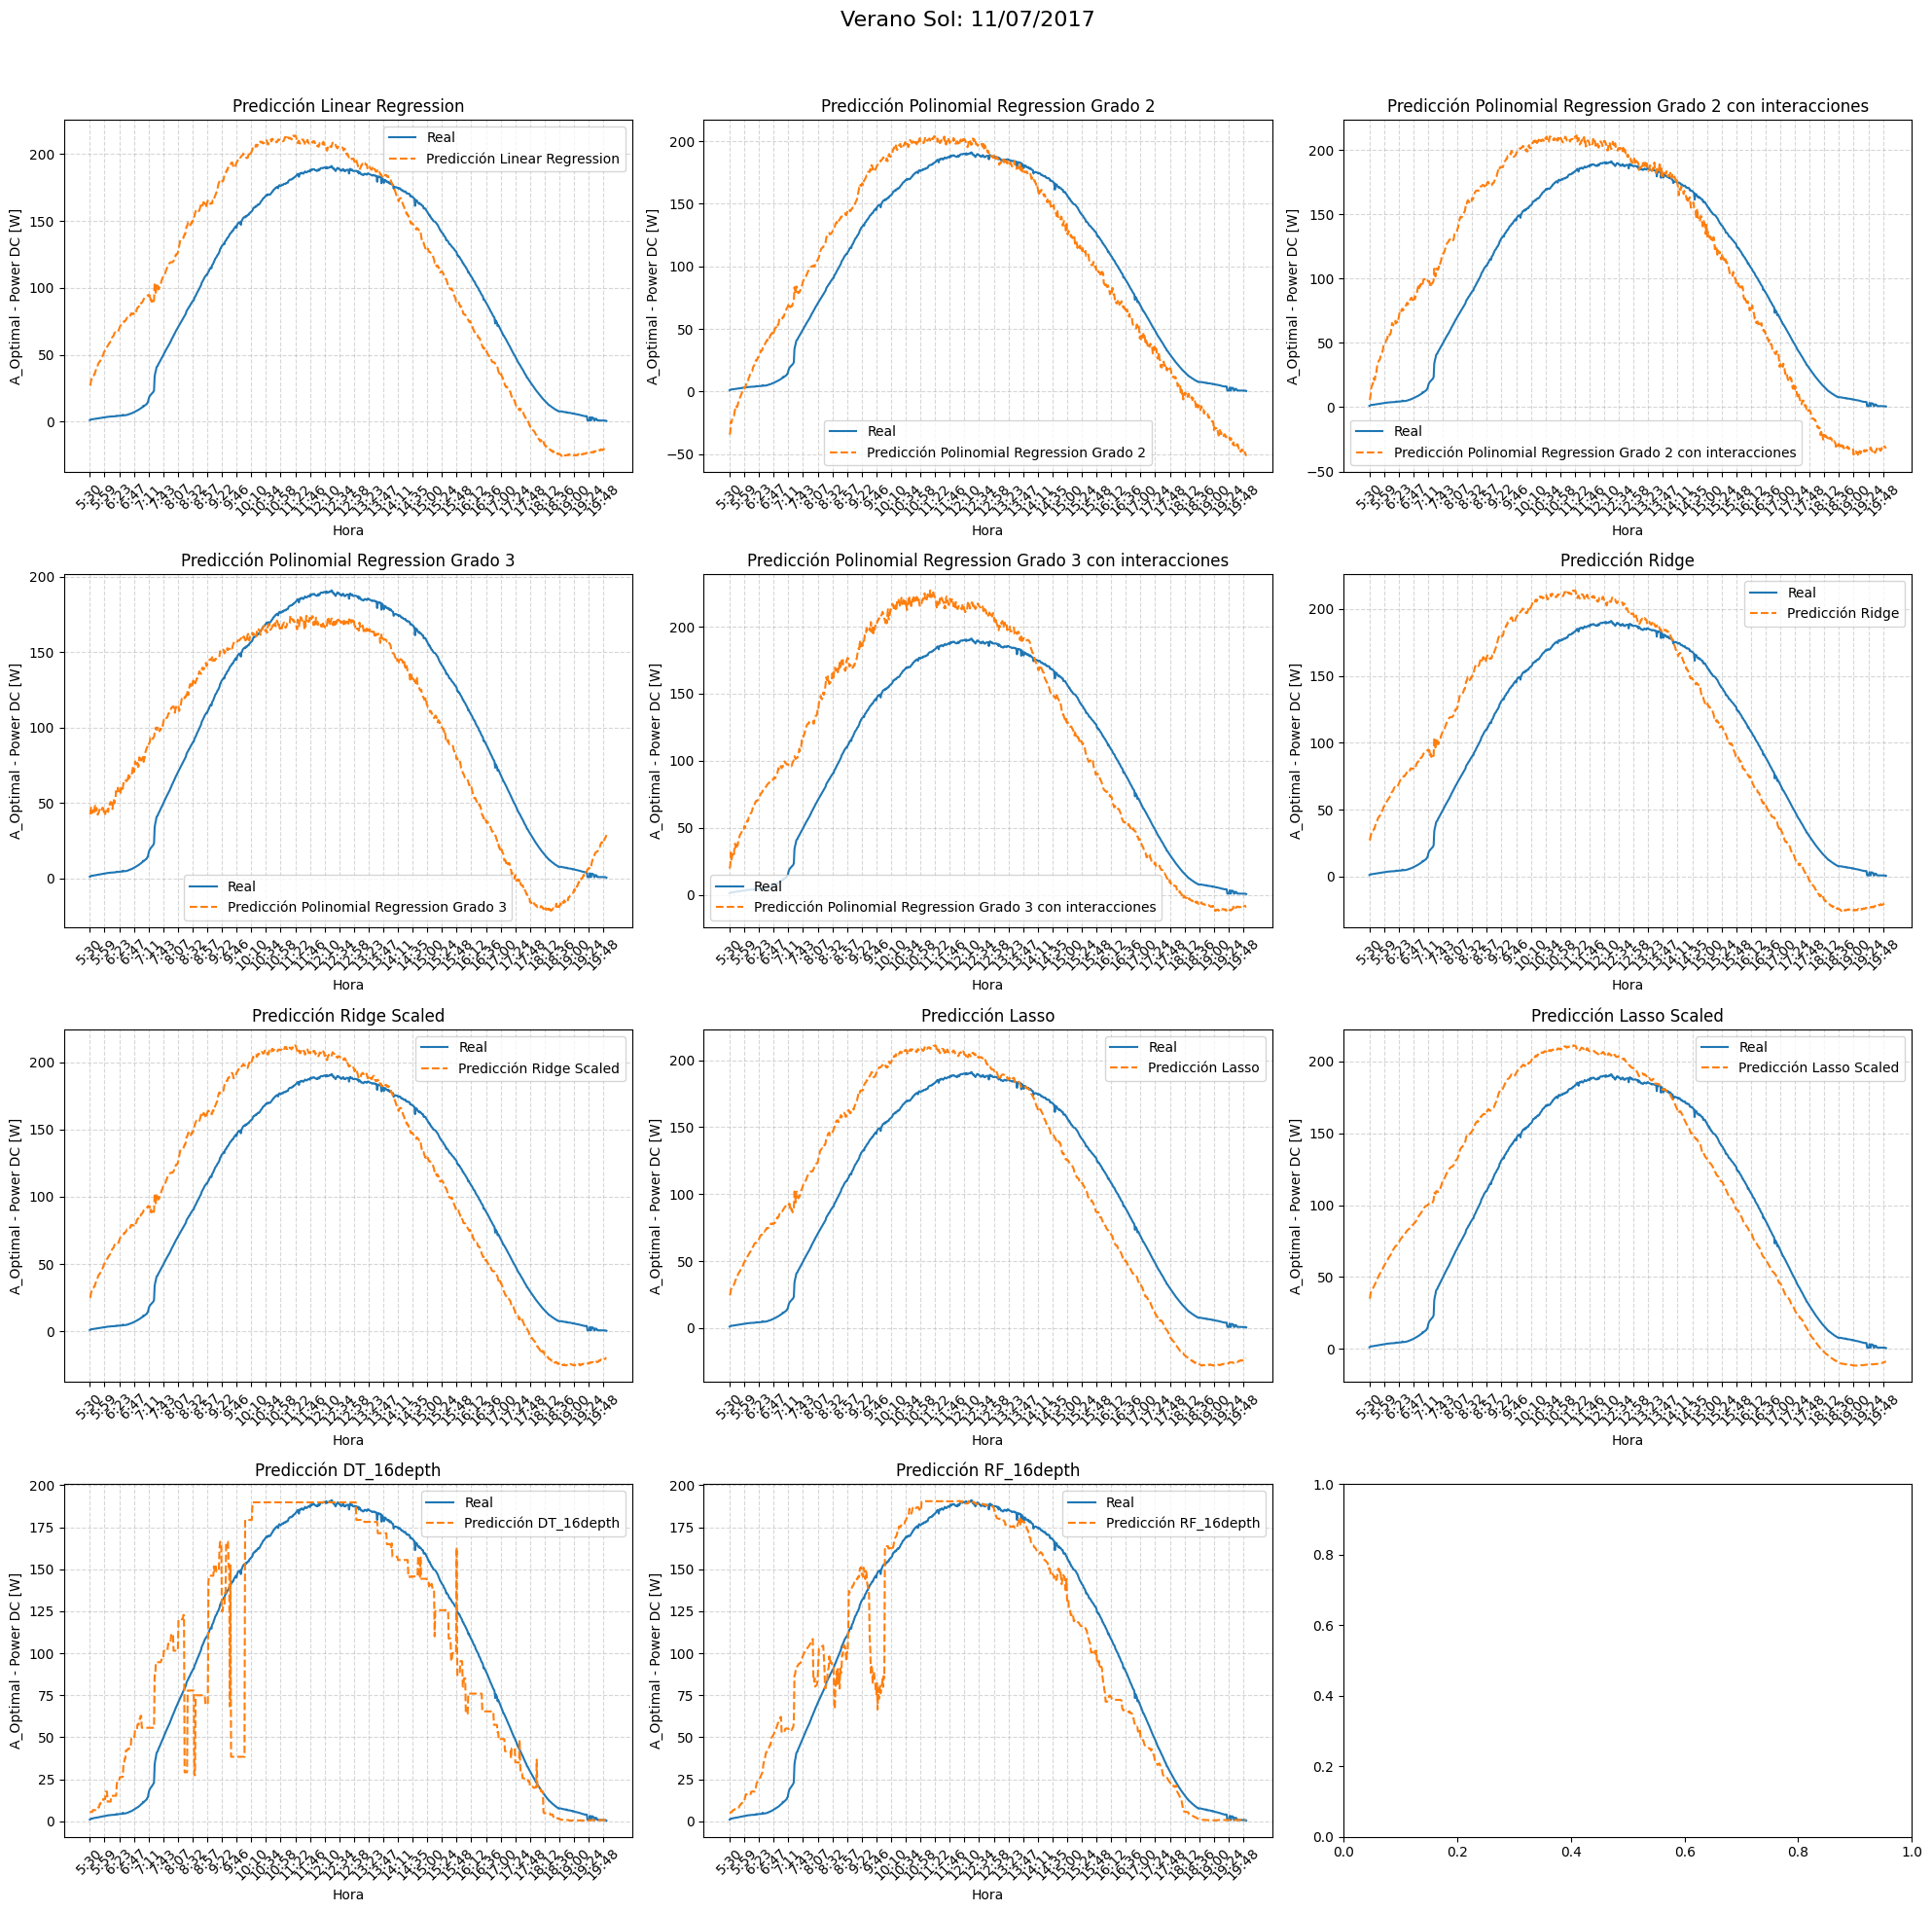

MSE  RMSE  R^2   MAE
Predicción RF_16depth                               505.93 22.49 0.90 16.35
Predicción DT_16depth                               821.26 28.66 0.84 19.78
Predicción Polinomial Regression Grado 2            751.26 27.41 0.85 24.33
Predicción Polinomial Regression Grado 3           1326.83 36.43 0.74 31.84
Predicción Lasso Scaled                            1546.44 39.32 0.69 32.62
Predicción Ridge Scaled                            1542.15 39.27 0.69 34.89
Predicción Lasso                                   1566.66 39.58 0.69 35.34
Predicción Ridge                                   1617.77 40.22 0.68 35.74
Predicción Linear Regression                       1617.82 40.22 0.68 35.74
Predicción Polinomial Regression Grado 2 con in... 1815.92 42.61 0.64 36.39
Predicción Polinomial Regression Grado 3 con in... 1854.74 43.07 0.63 37.16

In [ ]:
#Verano Sol
comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Predicción Linear Regression': LinearRegression_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Predicción Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Predicción Ridge': Ridge_model_pred.flatten(),
    'Predicción Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Predicción Lasso': Lasso_model_pred.flatten(),
    'Predicción Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'Predicción DT_16depth': DT16_model_pred.flatten(),
    'Predicción RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Crear la figura y los ejes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Verano Sol: 11/07/2017', fontsize=16)

# Lista de modelos
modelos = [
    'Predicción Linear Regression', 'Predicción Polynomial Regression Grado 2', 
    'Predicción Polynomial Regression Grado 2 con interacciones', 'Predicción Polynomial Regression Grado 3', 
    'Predicción Polynomial Regression Grado 3 con interacciones', 'Predicción Ridge', 
    'Predicción Ridge Scaled', 'Predicción Lasso', 'Predicción Lasso Scaled', 
    'Predicción DT_16depth', 'Predicción RF_16depth'
]
# Graficar cada modelo
for i, modelo in enumerate(modelos):
    ax = axes[i // 3, i % 3]
    datos_dia_mayor = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 7) & (comparacion['Día'] == 11)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Graficar los datos
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor[modelo], label=modelo, linestyle="--")
    ax.set_title(modelo)
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Filtrar los datos para el día 22/02/2017
dia_22_febrero = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 7) & (comparacion['Día'] == 11)]

# Extraer los valores reales y predichos
y_real = dia_22_febrero['Real'].values

# Inicializar un diccionario para almacenar las métricas
metricas = {}

# Lista de modelos
modelos = [
    'Predicción Linear Regression', 'Predicción Polynomial Regression Grado 2', 
    'Predicción Polynomial Regression Grado 2 con interacciones', 'Predicción Polynomial Regression Grado 3', 
    'Predicción Polynomial Regression Grado 3 con interacciones', 'Predicción Ridge', 
    'Predicción Lasso', 'Predicción Ridge Scaled', 'Predicción Lasso Scaled', 'Predicción DT_16depth', 'Predicción RF_16depth'
]

# Calcular las métricas para cada modelo
for modelo in modelos:
    y_pred = dia_22_febrero[modelo].values
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    
    metricas[modelo] = {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2,
        'MAE': mae
    }

# Mostrar las métricas
for modelo, valores in metricas.items():
    # Convertir las métricas en un DataFrame
    metricas_df = pd.DataFrame(metricas).T

# Mostrar el DataFrame de métricas
metricas_df.sort_values(by='MAE')

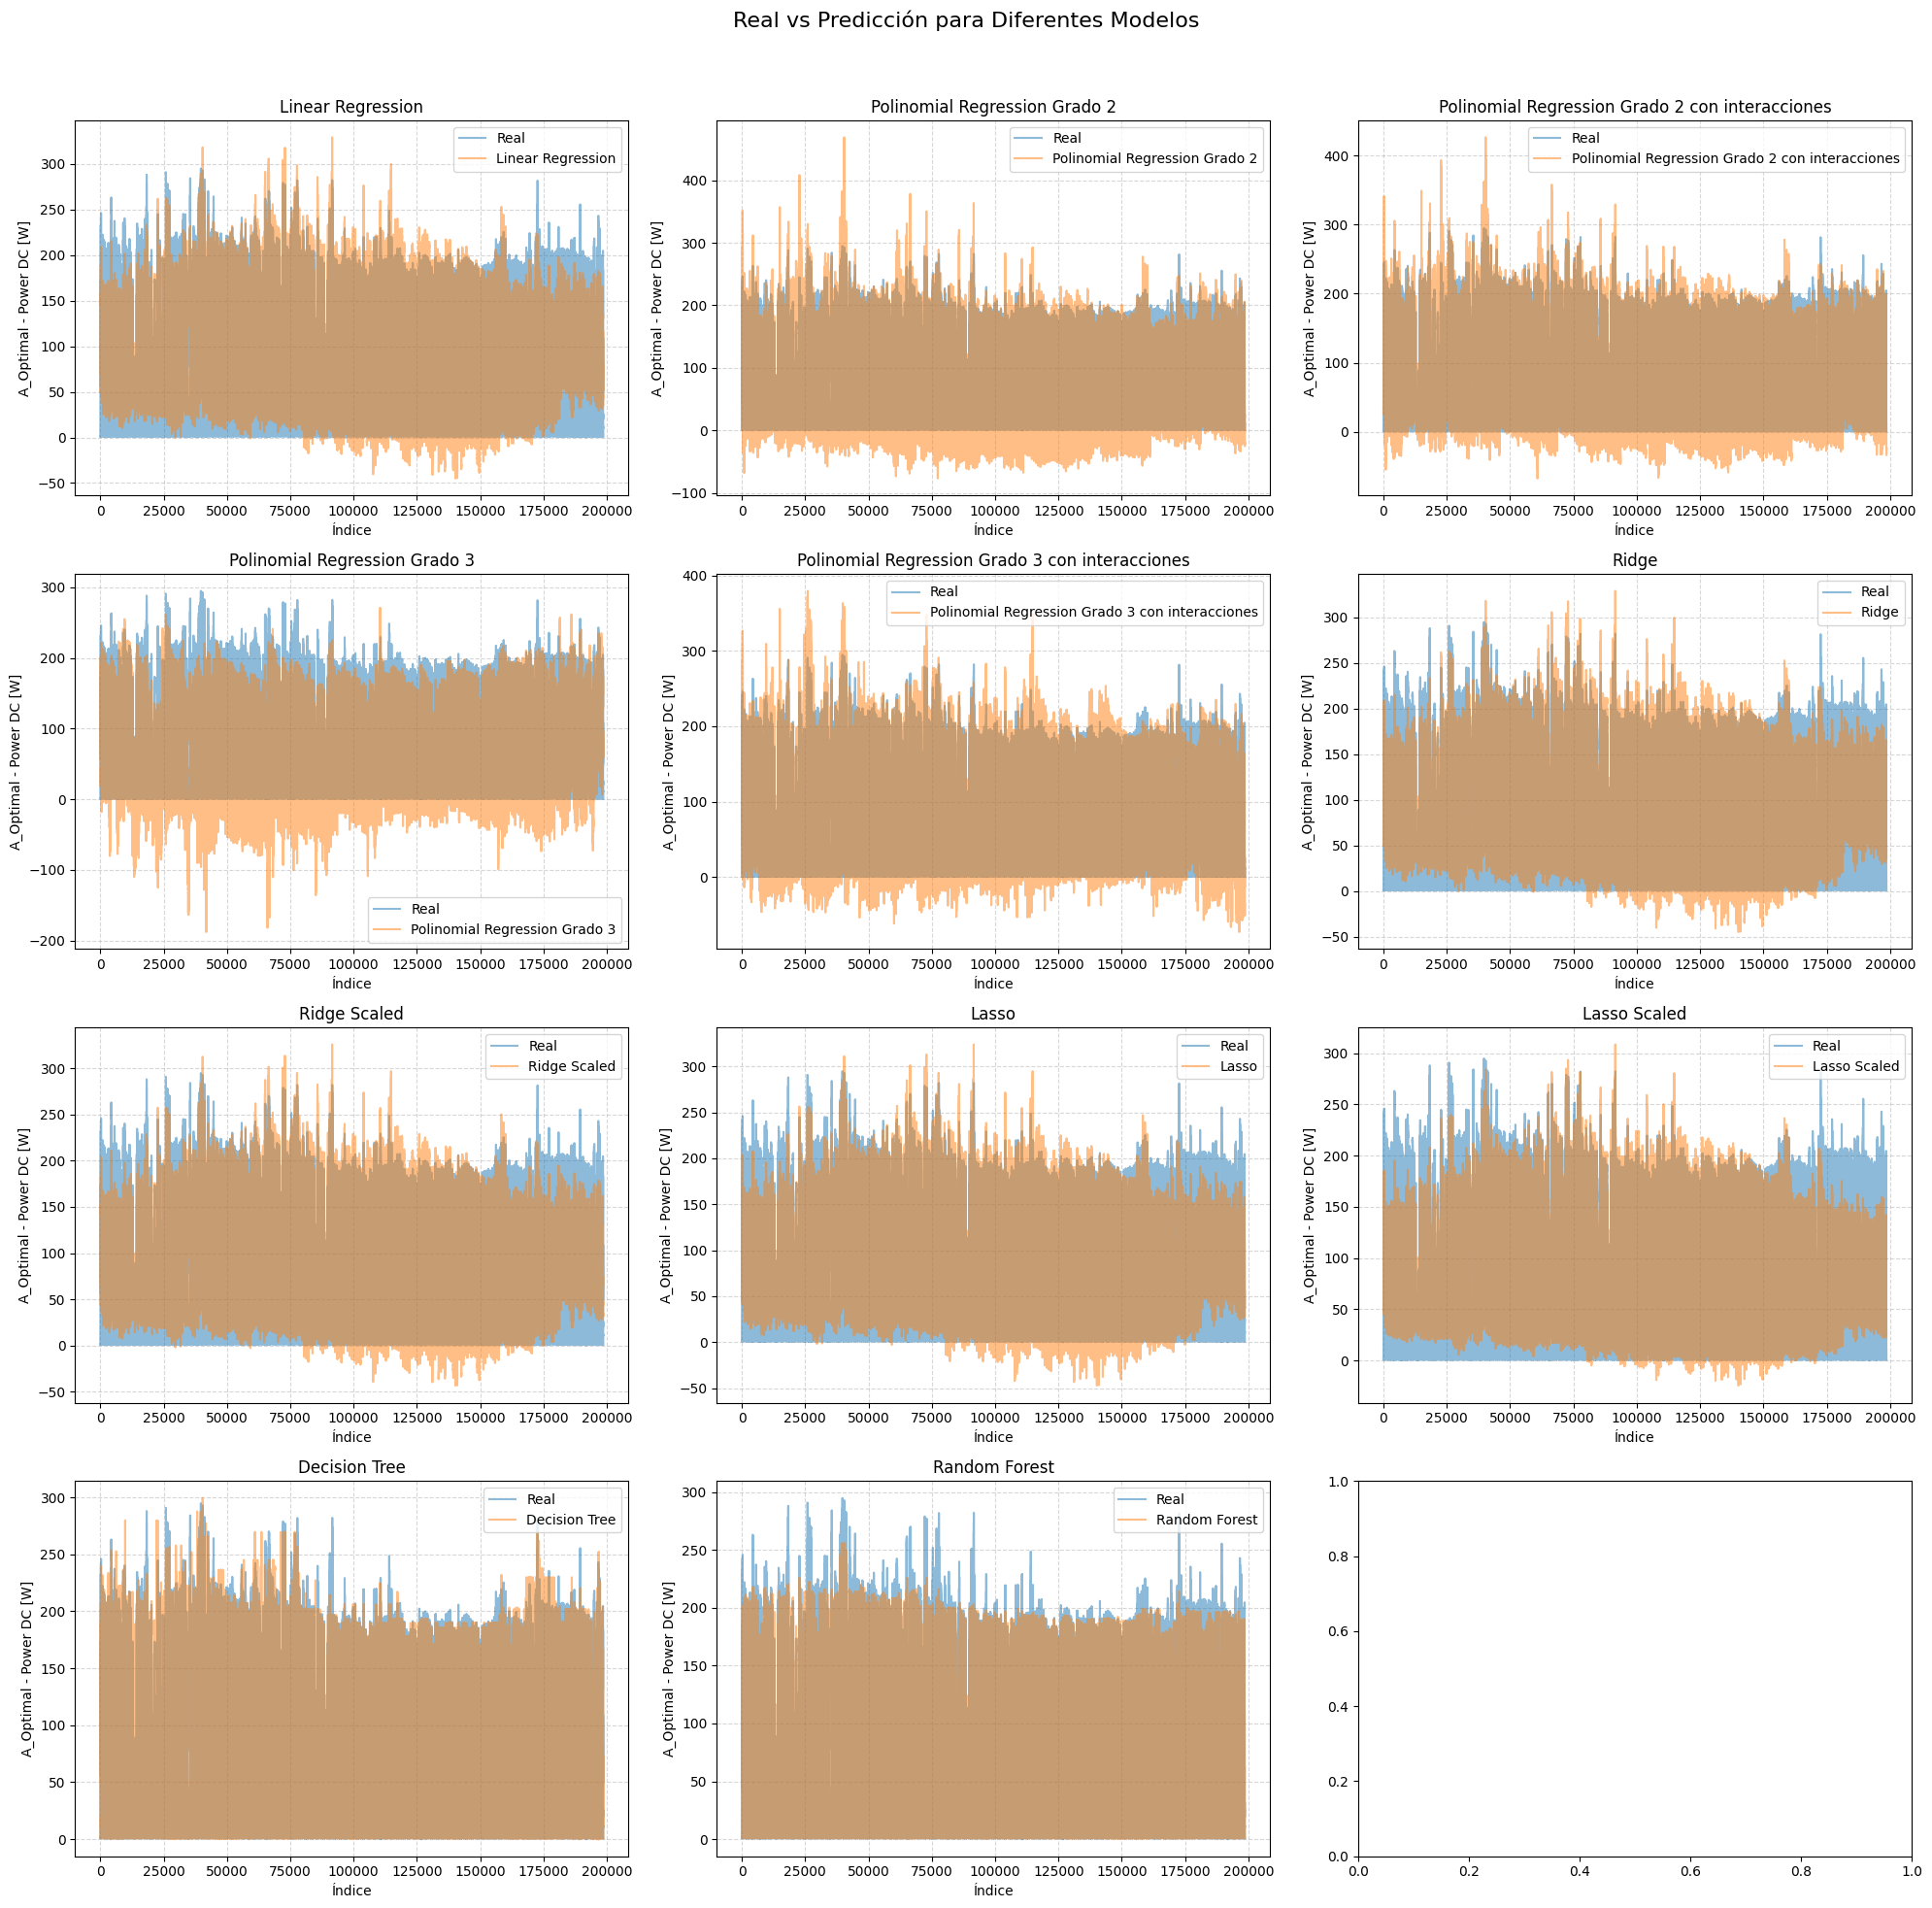

In [ ]:
import matplotlib.pyplot as plt

# Crear un DataFrame con los valores reales y predichos para cada modelo
comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Linear Regression': LinearRegression_model_pred.flatten(),
    'Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Ridge': Ridge_model_pred.flatten(),
    'Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Lasso': Lasso_model_pred.flatten(),
    'Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'Decision Tree': DT16_model_pred.flatten(),
    'Random Forest': RF16_model_pred.flatten()
})

# Crear la figura y los ejes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Real vs Predicción para Diferentes Modelos', fontsize=16)

# Lista de modelos
modelos = ['Linear Regression', 'Polynomial Regression Grado 2', 'Polynomial Regression Grado 2 con interacciones',
           'Polynomial Regression Grado 3', 'Polynomial Regression Grado 3 con interacciones', 'Ridge', 'Ridge Scaled',
           'Lasso', 'Lasso Scaled', 'Decision Tree', 'Random Forest']

# Graficar cada modelo
for i, modelo in enumerate(modelos):
    ax = axes[i // 3, i % 3]
    ax.plot(comparacion['Real'], label='Real', alpha=0.5)
    ax.plot(comparacion[modelo], label=modelo, alpha=0.5)
    ax.set_title(modelo)
    ax.set_xlabel('Índice')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 7. Energía (Area Bajo la curva) Real vs modelos

In [ ]:
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

# Crear un DataFrame con los valores reales y predichos.
comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Linear Regression': LinearRegression_model_pred.flatten(),
    'Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Ridge': Ridge_model_pred.flatten(),
    'Lasso': Lasso_model_pred.flatten(),
    'Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'DT_16depth': DT16_model_pred.flatten(),
    'RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Filtrar los datos para el año 2017
datos_2017 = comparacion[comparacion['Año'] == 2017]

modelos = [
    'Linear Regression', 'Polynomial Regression Grado 2', 
    'Polynomial Regression Grado 2 con interacciones', 'Polynomial Regression Grado 3', 
    'Polynomial Regression Grado 3 con interacciones', 'Ridge', 
    'Lasso', 'Ridge Scaled', 'Lasso Scaled', 'DT_16depth', 'RF_16depth'
]

# Inicializar una lista para almacenar los resultados
resultados_totales = []

# Iterar sobre cada día del año 2017
for mes in range(1, 13):
    for dia in range(1, 32):
        dia_datos = datos_2017[(datos_2017['Mes'] == mes) & (datos_2017['Día'] == dia)]
        if not dia_datos.empty:
            y_real = dia_datos['Real'].values
            x = np.arange(len(y_real))
            area_real = simpson_manual(y_real, x)
            
            for modelo in modelos:
                y_pred = dia_datos[modelo].values
                area_pred = simpson_manual(y_pred, x)
                error_relativo = abs(area_pred - area_real) / area_real * 100
                mae = np.mean(np.abs(y_real - y_pred))
                
                resultados_totales.append({
                    'Fecha': f'{dia}/{mes}/2017',
                    'Modelo': modelo,
                    'Área Real': area_real,
                    'Área Predicha': area_pred,
                    'Error Relativo (%)': error_relativo,
                    'MAE': mae
                })

# Crear un DataFrame con los resultados
df_resultados_totales = pd.DataFrame(resultados_totales)

# Mostrar el DataFrame con los resultados
print(df_resultados_totales)


In [42]:
df_resultados_totales.describe()

Área Real  Área Predicha  Error Relativo (%)     MAE
count    3047.00        3047.00             3047.00 3047.00
mean    72320.01       71806.45               18.02   29.60
std     20585.78       22385.56               55.00   10.84
min      3469.37      -68397.95                0.01    1.40
25%     67514.64       59824.83                3.95   22.58
50%     79502.76       75728.09                9.92   29.71
75%     85091.46       86687.69               18.29   35.50
max     97938.06      133299.71             1964.84  113.19

In [ ]:
# Encontrar el día con el error relativo máximo
dia_error_relativo_max = df_resultados_totales.loc[df_resultados_totales['Error Relativo (%)'].idxmax()]

# Mostrar el resultado
print(dia_error_relativo_max)

In [ ]:
# Sumar el área real y predicha por cada modelo
df_areas = df_resultados_totales.groupby('Modelo')[['Área Real', 'Área Predicha']].sum()

# Contar el número de registros por modelo
df_counts = df_resultados_totales.groupby('Modelo').size()

# Convertir las áreas a GWh dividiendo entre 1,000,000
df_areas = df_areas / 1_000_000

# Calcular el error relativo porcentual
df_areas['Error Relativo (%)'] = abs((df_areas['Área Predicha'] - df_areas['Área Real']) / df_areas['Área Real']) * 100

# Calcular el MAE (Error Absoluto Medio) en GWh
df_areas['MAE (MWh)'] = (abs(df_areas['Área Predicha'] - df_areas['Área Real']) / df_counts)*1000

# Ordenar por menor error relativo
df_areas = df_areas.sort_values(by='Error Relativo (%)')

df_areas

In [ ]:
# Crear un diccionario para almacenar los DataFrames
dataframes_resultados = {}

# Lista de modelos
modelos = df_resultados_totales['Modelo'].unique()

# Crear un DataFrame para cada modelo y almacenarlo en el diccionario
for modelo in modelos:
    dataframes_resultados[modelo] = df_resultados_totales[df_resultados_totales['Modelo'] == modelo][['Área Real', 'Área Predicha', 'Error Relativo (%)', 'MAE']].copy()

# Mostrar los DataFrames creados
for modelo, df in dataframes_resultados.items():
    print(f"DataFrame para el modelo: {modelo}")
    print(df.head())
    print("\n")

#Describe de cada dataframe
for modelo, df in dataframes_resultados.items():
    print(f"Describe para el modelo: {modelo}")
    print(df.describe())
    print("\n")

In [ ]:
#Para el día 5/6/2017
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

# Crear un DataFrame con los valores reales y predichos.
comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Linear Regression': LinearRegression_model_pred.flatten(),
    'Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Ridge': Ridge_model_pred.flatten(),
    'Lasso': Lasso_model_pred.flatten(),
    'Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'DT_16depth': DT16_model_pred.flatten(),
    'RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Filtrar los datos para el día 5 de junio de 2017
dia_5_junio = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 6) & (comparacion['Día'] == 5)]

# Extraer los valores de 'Real' y de cada modelo
y_real = dia_5_junio['Real'].values
x = np.arange(len(y_real))

# Calcular el área bajo la curva para los valores reales
area_real = simpson_manual(y_real, x)
print(f"Área bajo la curva para los valores reales: {area_real}")

# Calcular el área bajo la curva para cada modelo y crear un DataFrame con los resultados
resultados = []

modelos = [
    'Linear Regression', 'Polynomial Regression Grado 2', 
    'Polynomial Regression Grado 2 con interacciones', 'Polynomial Regression Grado 3', 
    'Polynomial Regression Grado 3 con interacciones', 'Ridge', 
    'Lasso', 'Ridge Scaled', 'Lasso Scaled', 'DT_16depth', 'RF_16depth'
]

for modelo in modelos:
    y_pred = dia_5_junio[modelo].values
    area_pred = simpson_manual(y_pred, x)
    error_relativo = abs(area_pred - area_real) / area_real * 100
    mae = np.mean(np.abs(y_real - y_pred))
    
    resultados.append({
        'Modelo': modelo,
        'Área Real': area_real,
        'Área Predicha': area_pred,
        'Error Relativo (%)': error_relativo,
        'MAE': mae
    })

df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame con los resultados
print(df_resultados)


In [ ]:
df_resultados_sorted = df_resultados.sort_values(by='MAE')
df_resultados_sorted

In [ ]:
#Para el día 18/12/2017
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

# Crear un DataFrame con los valores reales y predichos.
comparacion = pd.DataFrame({
    'Real': y_real_df.values.flatten(),
    'Linear Regression': LinearRegression_model_pred.flatten(),
    'Polynomial Regression Grado 2': PolynomialRegressionGrado2_model_pred.flatten(),
    'Polynomial Regression Grado 2 con interacciones': PolynomialRegressionGrado2Interac_model_pred.flatten(),
    'Polynomial Regression Grado 3': PolynomialRegressionGrado3_model_pred.flatten(),
    'Polynomial Regression Grado 3 con interacciones': PolynomialRegressionGrado3Interac_model_pred.flatten(),
    'Ridge': Ridge_model_pred.flatten(),
    'Lasso': Lasso_model_pred.flatten(),
    'Ridge Scaled': RidgeScaled_model_pred_inv.flatten(),
    'Lasso Scaled': LassoScaled_model_pred_inv.flatten(),
    'DT_16depth': DT16_model_pred.flatten(),
    'RF_16depth': RF16_model_pred.flatten(),
    'Mes': df_copy_sin_nulos_sin_outliers['Mes'].values.flatten(),
    'Año': df_copy_sin_nulos_sin_outliers['Año'].values.flatten(),
    'Día': df_copy_sin_nulos_sin_outliers['Día'].values.flatten(),
    'Hora': df_copy_sin_nulos_sin_outliers['Hora'].values.flatten(),
    'Minuto': df_copy_sin_nulos_sin_outliers['Minuto'].values.flatten()
})

# Filtrar los datos para el día 5 de junio de 2017
dia_5_junio = comparacion[(comparacion['Año'] == 2017) & (comparacion['Mes'] == 12) & (comparacion['Día'] == 18)]

# Extraer los valores de 'Real' y de cada modelo
y_real = dia_5_junio['Real'].values
x = np.arange(len(y_real))

# Calcular el área bajo la curva para los valores reales
area_real = simpson_manual(y_real, x)
print(f"Área bajo la curva para los valores reales: {area_real}")

# Calcular el área bajo la curva para cada modelo y crear un DataFrame con los resultados
resultados = []

modelos = [
    'Linear Regression', 'Polynomial Regression Grado 2', 
    'Polynomial Regression Grado 2 con interacciones', 'Polynomial Regression Grado 3', 
    'Polynomial Regression Grado 3 con interacciones', 'Ridge', 
    'Lasso', 'Ridge Scaled', 'Lasso Scaled', 'DT_16depth', 'RF_16depth'
]


for modelo in modelos:
    y_pred = dia_5_junio[modelo].values
    area_pred = simpson_manual(y_pred, x)
    error_relativo = abs(area_pred - area_real) / area_real * 100
    mae = np.mean(np.abs(y_real - y_pred))
    
    resultados.append({
        'Modelo': modelo,
        'Área Real': area_real,
        'Área Predicha': area_pred,
        'Error Relativo (%)': error_relativo,
        'MAE': mae
    })

df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame con los resultados
print(df_resultados)


In [ ]:
df_resultados_sorted = df_resultados.sort_values(by='MAE')
df_resultados_sorted